<a href="https://colab.research.google.com/github/wanhh82yn/Nhom7_StudentPerformanceDataSet/blob/main/CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================================================
# PHẦN 1: CÀI ĐẶT MÔI TRƯỜNG VÀ TẢI DỮ LIỆU
# ==========================================================

# Nhập các thư viện xử lý dữ liệu và trực quan hóa
import pandas as pd                  # Xử lý dữ liệu dạng bảng
import numpy as np                   # Tính toán số học
import seaborn as sns                # Vẽ biểu đồ thống kê
import matplotlib.pyplot as plt      # Vẽ biểu đồ cơ bản

# Thư viện để tải file từ máy người dùng (chỉ dùng trong Google Colab)
from google.colab import files

# Nhập các công cụ tiền xử lý dữ liệu
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

# Nhập các công cụ chia dữ liệu và tìm tham số tối ưu
from sklearn.model_selection import train_test_split, GridSearchCV

# Nhập các mô hình hồi quy và phân loại
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier  # Mô hình XGBoost mạnh mẽ

# Nhập các hàm đánh giá mô hình
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score

# Nhập công cụ giảm chiều dữ liệu
from sklearn.decomposition import PCA

# Thư viện giải thích mô hình (SHAP)
import shap
import inspect

# ================================
# TẢI FILE CSV TỪ MÁY NGƯỜI DÙNG
# ================================

print("Tải file student-mat.csv")    # Yêu cầu người dùng tải file dữ liệu môn Toán
uploaded1 = files.upload()

print("Tải file student-por.csv")    # Yêu cầu người dùng tải file dữ liệu môn Bồ Đào Nha
uploaded2 = files.upload()

# ================================
# ĐỌC DỮ LIỆU VÀ GỘP THÀNH MỘT BẢNG
# ================================

# Đọc file CSV môn Toán, phân cách bằng dấu chấm phẩy
mat = pd.read_csv("student-mat.csv", sep=";")

# Đọc file CSV môn Bồ Đào Nha
por = pd.read_csv("student-por.csv", sep=";")

# Thêm cột 'subject' để phân biệt môn học
mat["subject"] = "Math"
por["subject"] = "Portuguese"

# Gộp hai bảng dữ liệu thành một bảng duy nhất
df = pd.concat([mat, por], ignore_index=True)

# In ra kích thước của bảng dữ liệu sau khi gộp
print("Kích thước dữ liệu sau khi gộp:", df.shape)

# Hiển thị 5 dòng đầu tiên của bảng dữ liệu
df.head()

Tải file student-mat.csv


Saving student-mat.csv to student-mat.csv
Tải file student-por.csv


Saving student-por.csv to student-por.csv
Kích thước dữ liệu sau khi gộp: (1044, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


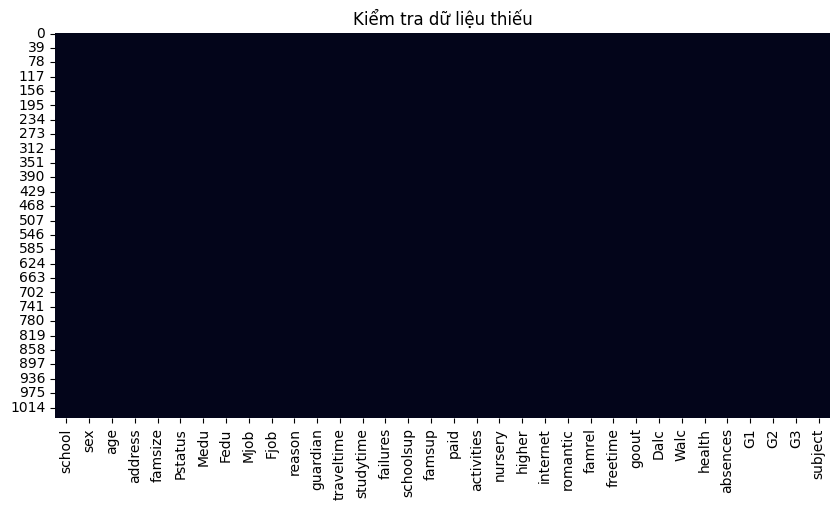

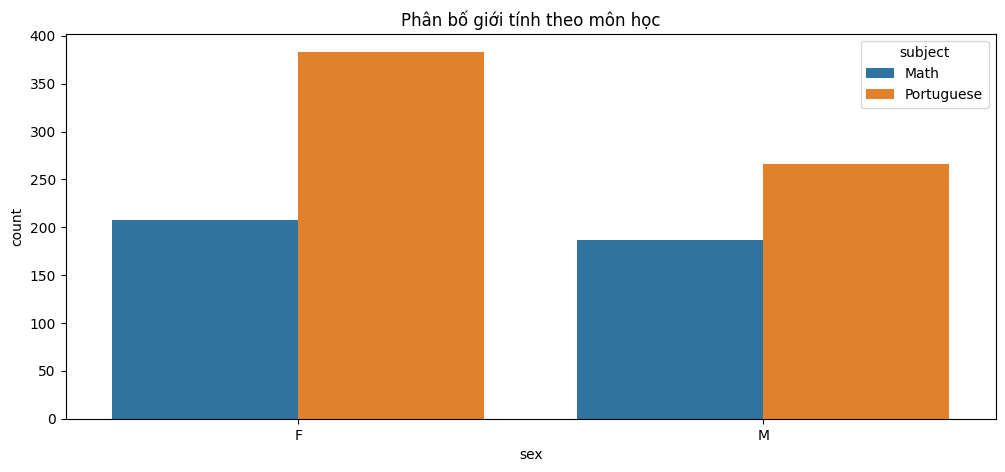

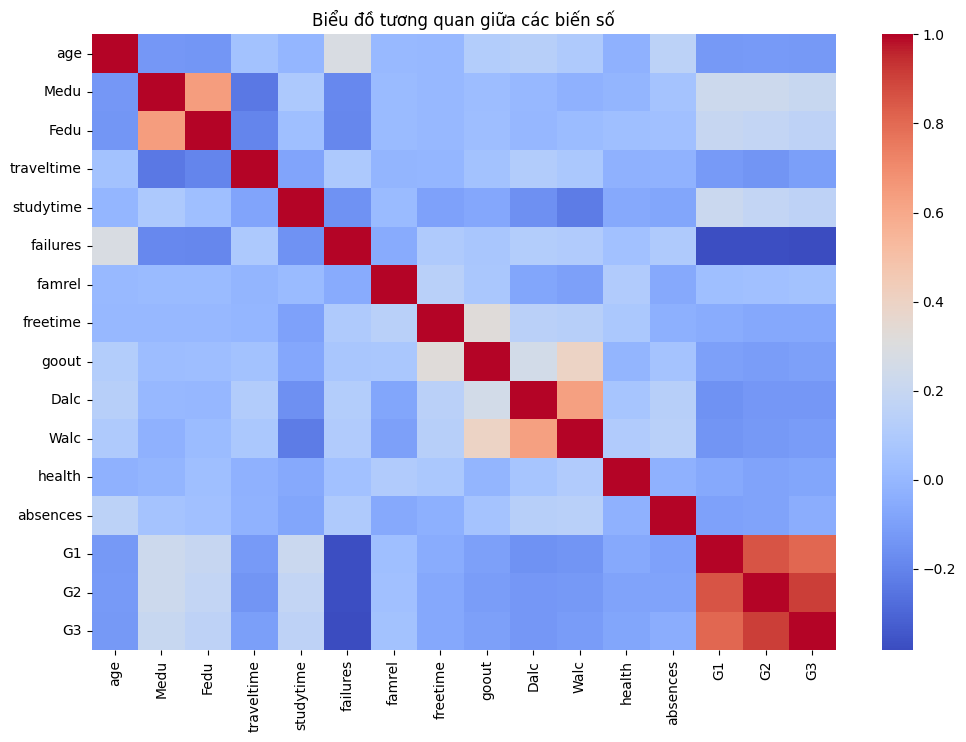

In [ ]:
# ==========================================================
# PHẦN 2: KHẢO SÁT & LÀM SẠCH DỮ LIỆU
# ==========================================================

# Hiển thị thông tin tổng quan về dataframe: số dòng, số cột, kiểu dữ liệu, số lượng giá trị không null
df.info()

# Kiểm tra số lượng giá trị thiếu ở mỗi cột
print(df.isnull().sum())

# Xóa các dòng trùng lặp trong dữ liệu
df = df.drop_duplicates()

# Kiểm tra lại số dòng trùng sau khi đã xóa
print("Số dòng trùng:", df.duplicated().sum())

# Thống kê mô tả các cột số: trung bình, min, max, độ lệch chuẩn,...
display(df.describe())

# ================================
# TRỰC QUAN HÓA DỮ LIỆU THIẾU
# ================================

plt.figure(figsize=(10,5))  # Kích thước biểu đồ
sns.heatmap(df.isnull(), cbar=False)  # Vẽ heatmap thể hiện dữ liệu thiếu
plt.title("Kiểm tra dữ liệu thiếu")  # Tiêu đề biểu đồ
plt.show()

# ================================
# PHÂN BỐ GIỚI TÍNH THEO MÔN HỌC
# ================================

plt.figure(figsize=(12,5))  # Kích thước biểu đồ
sns.countplot(data=df, x='sex', hue='subject')  # Đếm số lượng học sinh theo giới tính và môn học
plt.title("Phân bố giới tính theo môn học")  # Tiêu đề biểu đồ
plt.show()

# ================================
# BIỂU ĐỒ TƯƠNG QUAN GIỮA CÁC BIẾN SỐ
# ================================

plt.figure(figsize=(12,8))  # Kích thước biểu đồ
corr = df.select_dtypes(include=['int64','float64']).corr()  # Tính ma trận tương quan giữa các biến số
sns.heatmap(corr, annot=False, cmap='coolwarm')  # Vẽ heatmap tương quan
plt.title("Biểu đồ tương quan giữa các biến số")  # Tiêu đề biểu đồ
plt.show()

Biến nhị phân: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']
Biến đa trị: ['Mjob', 'Fjob', 'reason', 'guardian']


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Shape X_encoded: (1044, 47)


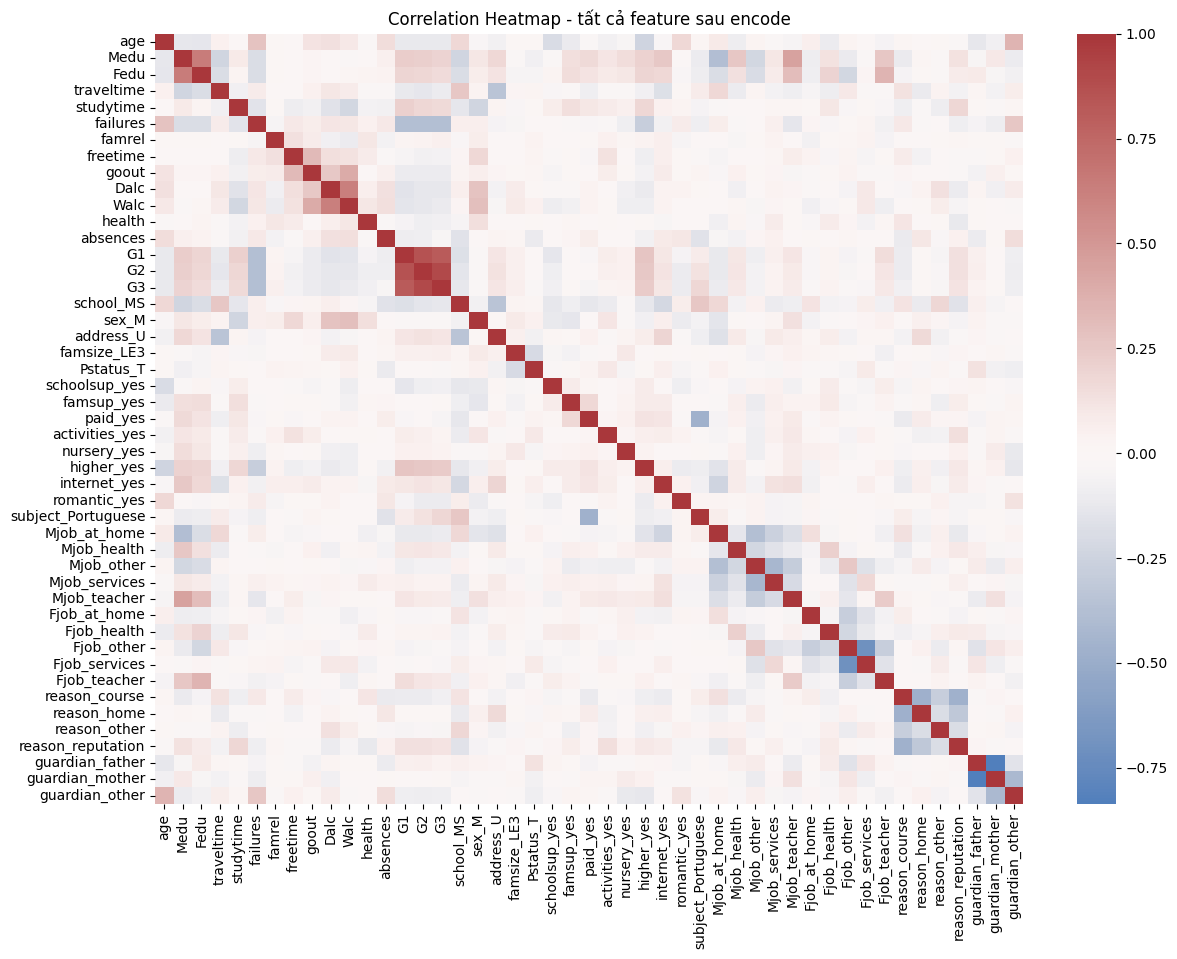

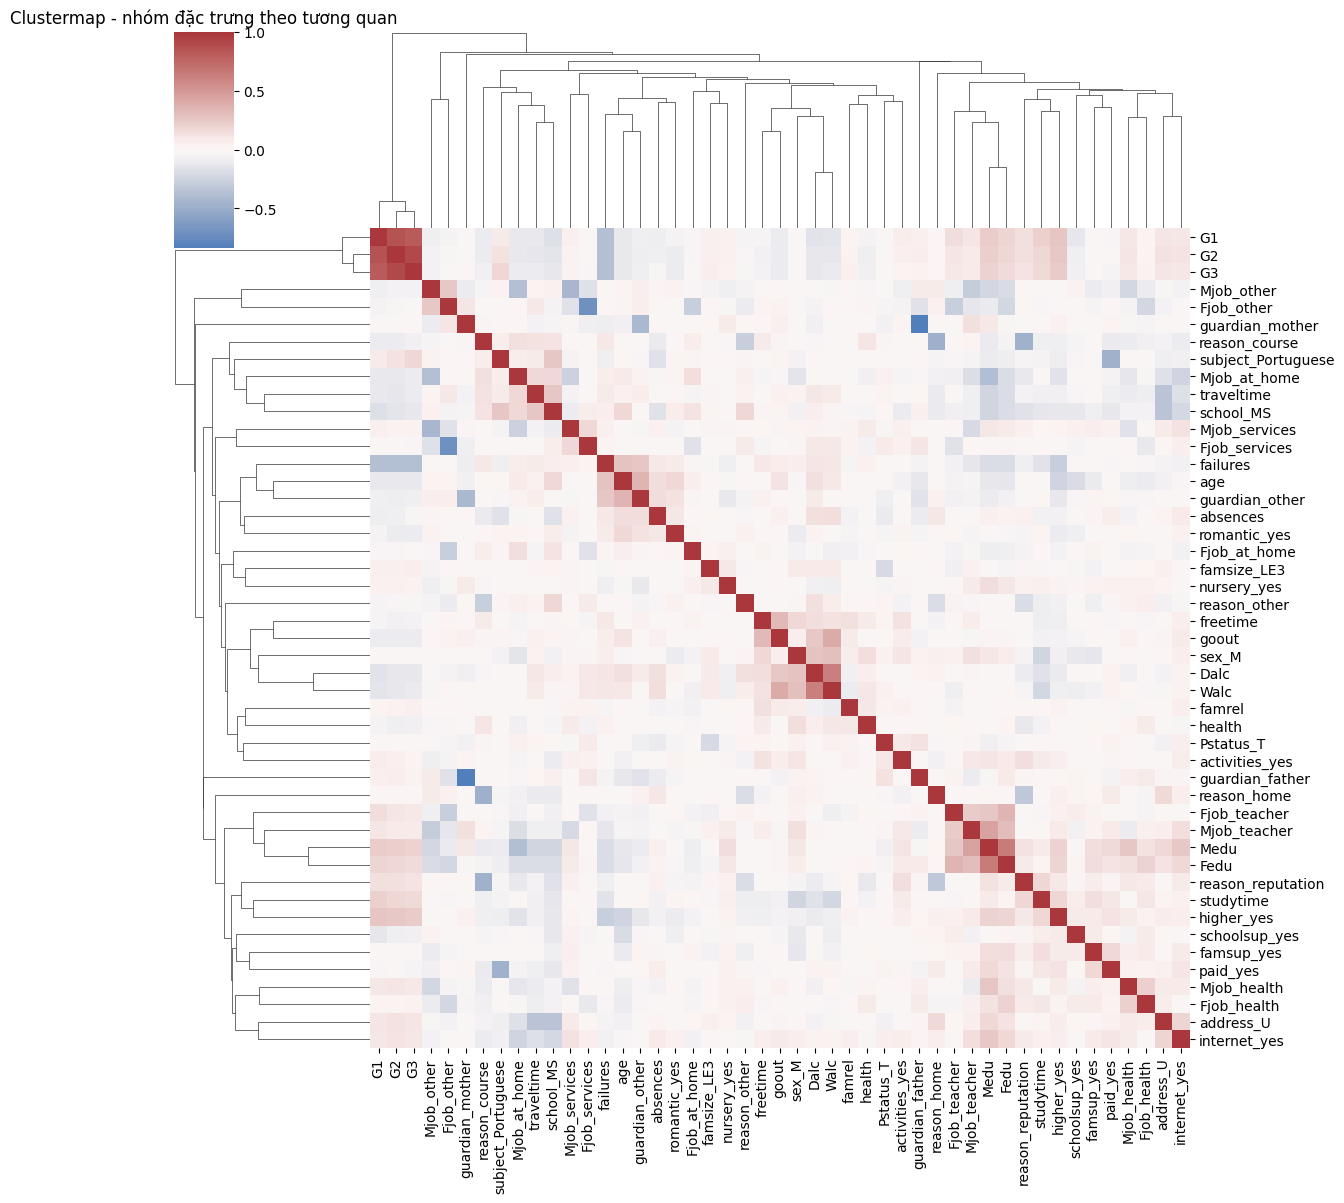

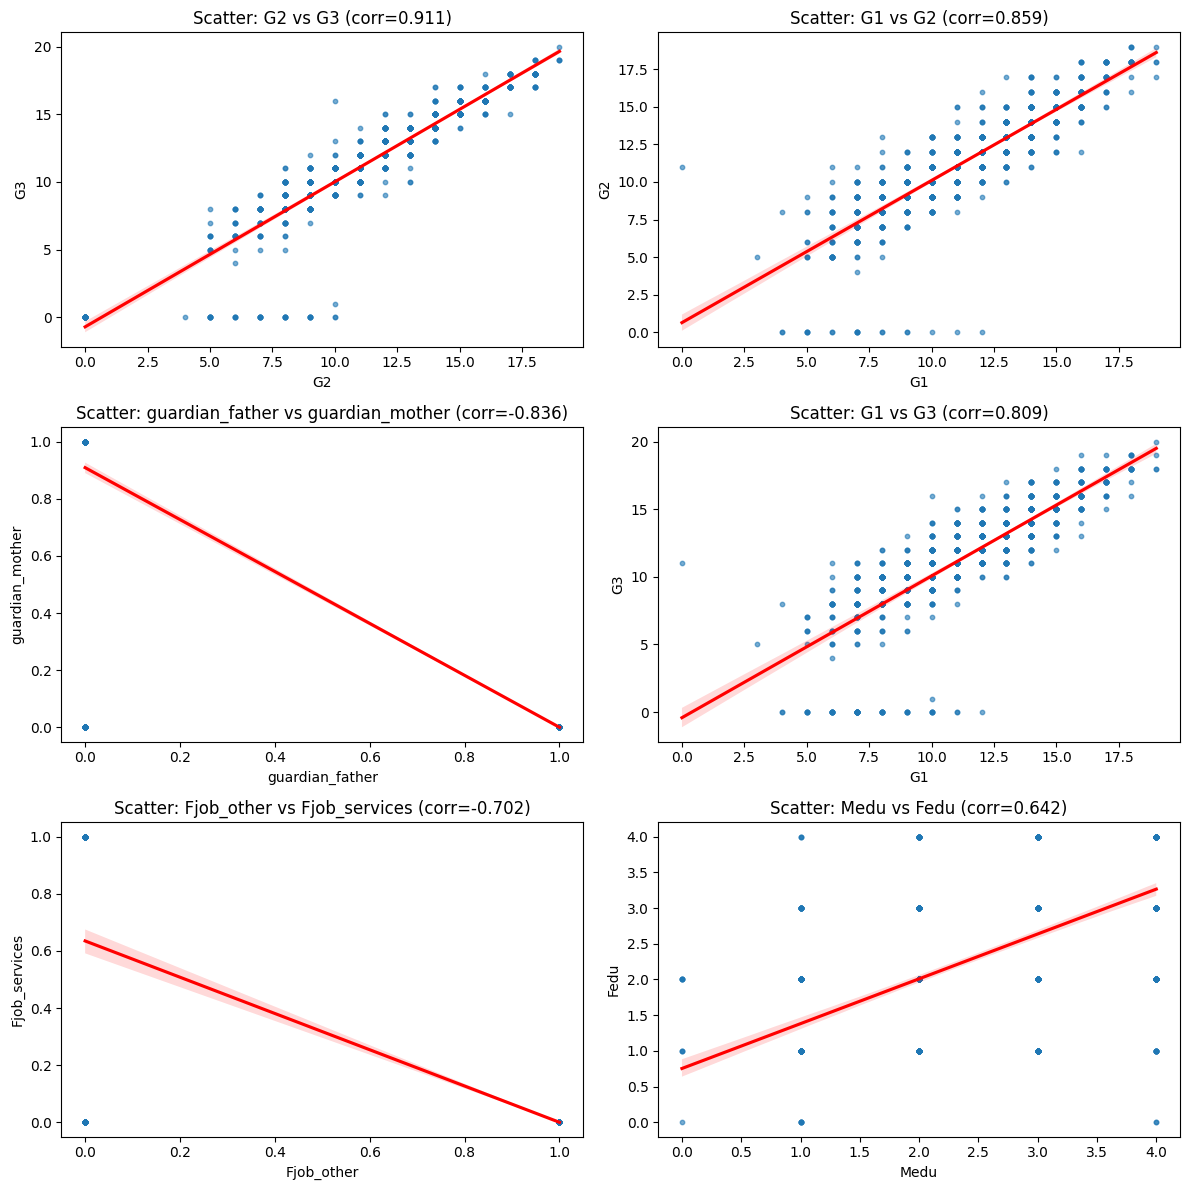

In [ ]:
# PHẦN 3: ENCODING BIẾN PHÂN LOẠI
import inspect
from sklearn.preprocessing import OneHotEncoder

# ---- 3.1: Tạo danh sách cột (numeric / categorical)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()  # Cột số
cat_cols = df.select_dtypes(include=['object']).columns.tolist()               # Cột phân loại (chuỗi)
if 'subject' in cat_cols:
    cat_cols.remove('subject')  # Tạm loại bỏ 'subject' để xử lý riêng
cat_cols.append('subject')      # Đưa 'subject' vào cuối danh sách phân loại

# Phân loại biến phân loại thành nhị phân (2 giá trị) và đa trị (>2 giá trị)
binary_cols = [c for c in cat_cols if df[c].nunique() == 2]
multi_cols = [c for c in cat_cols if df[c].nunique() > 2]

print("Biến nhị phân:", binary_cols)
print("Biến đa trị:", multi_cols)

# ---- 3.2: Tạo OneHotEncoder tương thích nhiều phiên bản sklearn
ohe_sig = inspect.signature(OneHotEncoder)
use_sparse_output = 'sparse_output' in ohe_sig.parameters  # Kiểm tra phiên bản sklearn hỗ trợ tham số mới

# Hàm tạo OneHotEncoder với tùy chọn drop='if_binary' nếu cần
def make_ohe(drop_if_binary=False):
    if use_sparse_output:
        return OneHotEncoder(drop='if_binary' if drop_if_binary else None,
                             sparse_output=False, handle_unknown='ignore')
    else:
        return OneHotEncoder(drop='if_binary' if drop_if_binary else None,
                             sparse=False, handle_unknown='ignore')

from sklearn.compose import ColumnTransformer
# Thiết lập pipeline xử lý: giữ nguyên biến số, mã hóa nhị phân và đa trị
transformers = [('num','passthrough', numeric_cols)]
if len(binary_cols) > 0:
    transformers.append(('bin', make_ohe(True), binary_cols))
if len(multi_cols) > 0:
    transformers.append(('ohe', make_ohe(False), multi_cols))

preprocessor = ColumnTransformer(transformers=transformers, remainder='drop')  # Bỏ các cột không được chỉ định

# ---- 3.3: Fit-transform toàn bộ DF để có feature matrix tạm ----
X_temp = preprocessor.fit_transform(df)  # Áp dụng pipeline để mã hóa dữ liệu

# ---- 3.4: Xây dựng feature_names robust ----
feature_names = numeric_cols.copy()  # Bắt đầu với tên các biến số

# Lấy tên feature từ encoder nhị phân (nếu có)
if len(binary_cols) > 0:
    try:
        bin_enc = preprocessor.named_transformers_['bin']
        if hasattr(bin_enc, 'get_feature_names_out'):
            feature_names += list(bin_enc.get_feature_names_out(binary_cols))
        else:
            cats = bin_enc.categories_
            for i, col in enumerate(binary_cols):
                if len(cats[i]) == 2:
                    feature_names.append(f"{col}_{cats[i][1]}")
                else:
                    for v in cats[i]:
                        feature_names.append(f"{col}_{v}")
    except Exception:
        feature_names += binary_cols  # Nếu lỗi, dùng tên cột gốc

# Lấy tên feature từ encoder đa trị (nếu có)
if len(multi_cols) > 0:
    try:
        ohe_enc = preprocessor.named_transformers_['ohe']
        if hasattr(ohe_enc, 'get_feature_names_out'):
            feature_names += list(ohe_enc.get_feature_names_out(multi_cols))
        else:
            cats = ohe_enc.categories_
            for i, col in enumerate(multi_cols):
                for v in cats[i]:
                    feature_names.append(f"{col}_{v}")
    except Exception:
        feature_names += multi_cols  # Nếu lỗi, dùng tên cột gốc

# Nếu số lượng tên không khớp số cột, tạo tên mặc định để tránh lỗi
if len(feature_names) != X_temp.shape[1]:
    feature_names = [f"f_{i}" for i in range(X_temp.shape[1])]

# Chuyển mảng kết quả thành DataFrame để dễ thao tác
import pandas as pd
X_encoded = pd.DataFrame(X_temp, columns=feature_names)

# Hiển thị vài dòng đầu để kiểm tra
display(X_encoded.head())
print("Shape X_encoded:", X_encoded.shape)

# 3.5: 1) Correlation heatmap (ma trận tương quan)
plt.figure(figsize=(14,10))
corr_matrix = X_encoded.corr()  # Tính ma trận tương quan
sns.heatmap(corr_matrix, cmap='vlag', center=0)  # Vẽ heatmap
plt.title("Correlation Heatmap - tất cả feature sau encode")
plt.show()
# 3.6: 2) Clustermap nhóm đặc trưng gần nhau
sns.clustermap(corr_matrix, cmap='vlag', center=0, figsize=(12,12))
plt.title("Clustermap - nhóm đặc trưng theo tương quan")
plt.show()

# 3.7: 3) Scatterplot các cặp đặc trưng tương quan cao
corr_vals = corr_matrix.abs().where(~np.eye(corr_matrix.shape[0],dtype=bool))

# Lấy chỉ phần tam giác trên để tránh trùng lặp
upper_tri_ix = np.triu_indices_from(corr_matrix, k=1)
pairs = []
for i, j in zip(*upper_tri_ix):
    pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iat[i,j]))

# Sắp xếp các cặp theo độ tương quan giảm dần
pairs_sorted = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)

# Chọn top k cặp có tương quan lớn hơn ngưỡng
top_k = 6
threshold = 0.3
selected = [p for p in pairs_sorted if abs(p[2]) >= threshold][:top_k]

# Vẽ scatter plot + đường hồi quy cho từng cặp
import math
n = len(selected)
cols = 2
rows = math.ceil(n/cols)
plt.figure(figsize=(6*cols, 4*rows))
for idx, (f1, f2, corrval) in enumerate(selected, start=1):
    plt.subplot(rows, cols, idx)
    sns.regplot(x=X_encoded[f1], y=X_encoded[f2], scatter_kws={'s':10, 'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f"Scatter: {f1} vs {f2} (corr={corrval:.3f})")
    plt.xlabel(f1)
    plt.ylabel(f2)
plt.tight_layout()
plt.show()

# Nếu không có cặp nào vượt ngưỡng, in cảnh báo
if len(selected) == 0:
    print("Không tìm thấy cặp đặc trưng có |corr| >= ", threshold)

X_for_model = X_encoded.copy()
feature_names = X_for_model.columns.tolist()


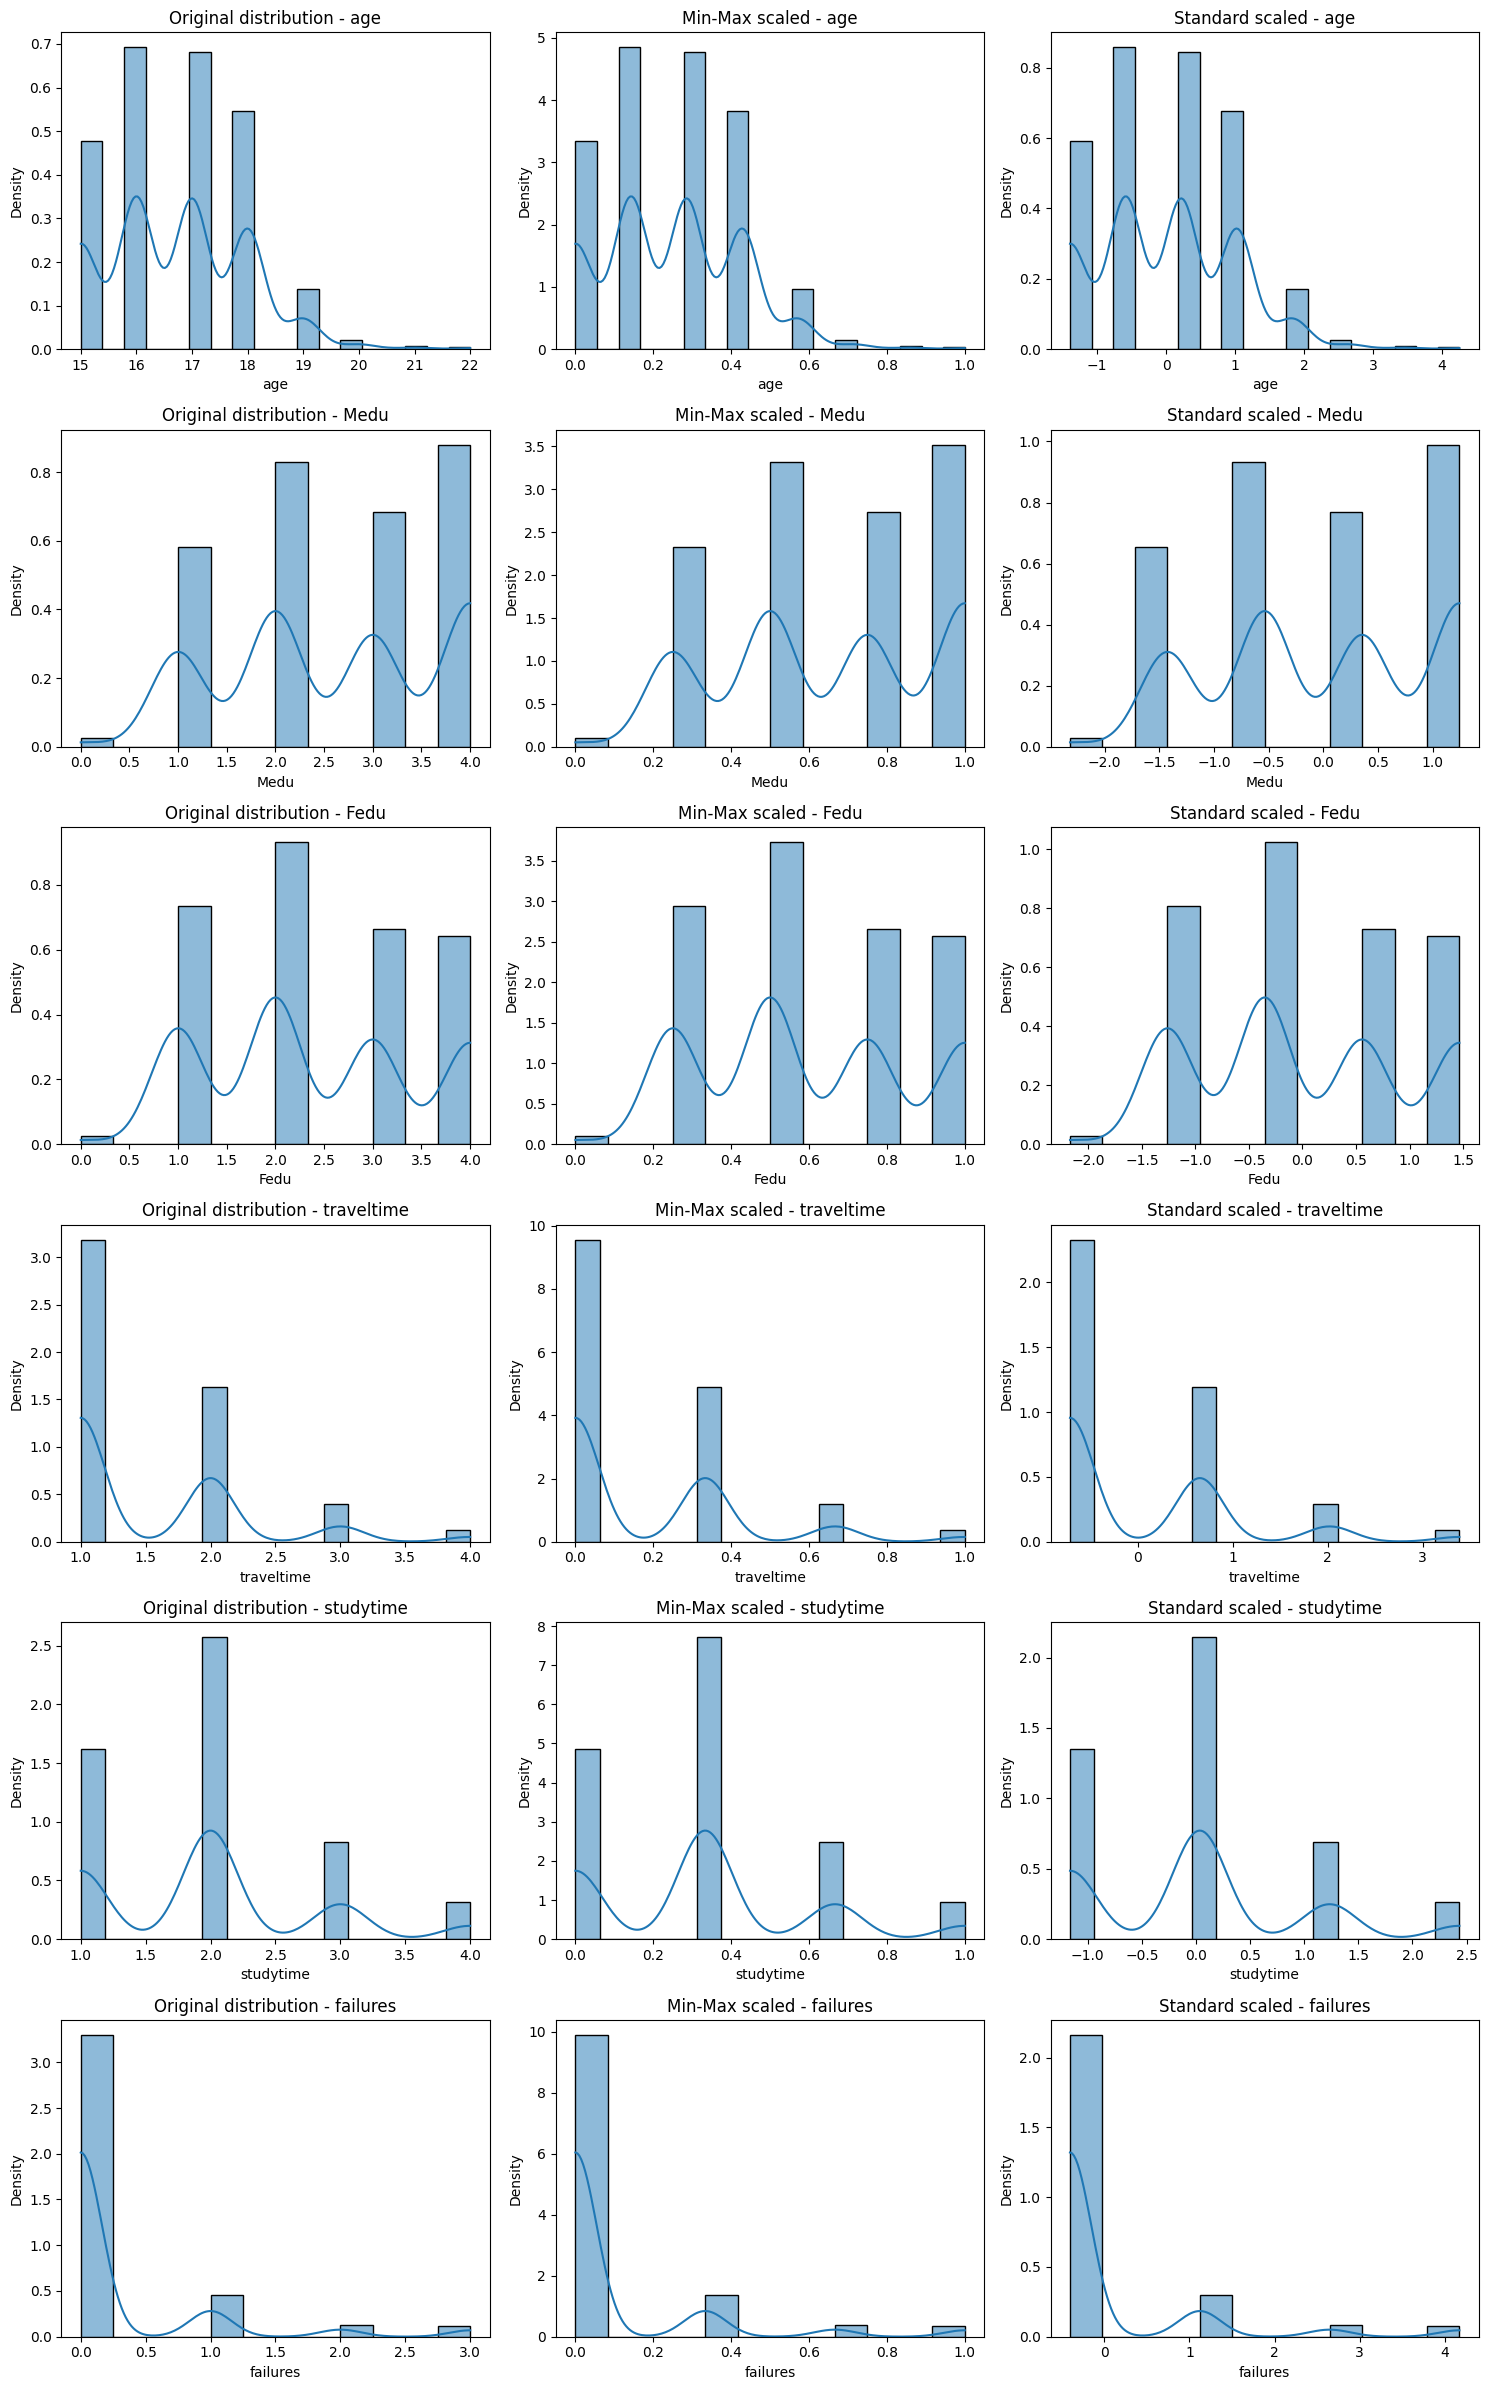

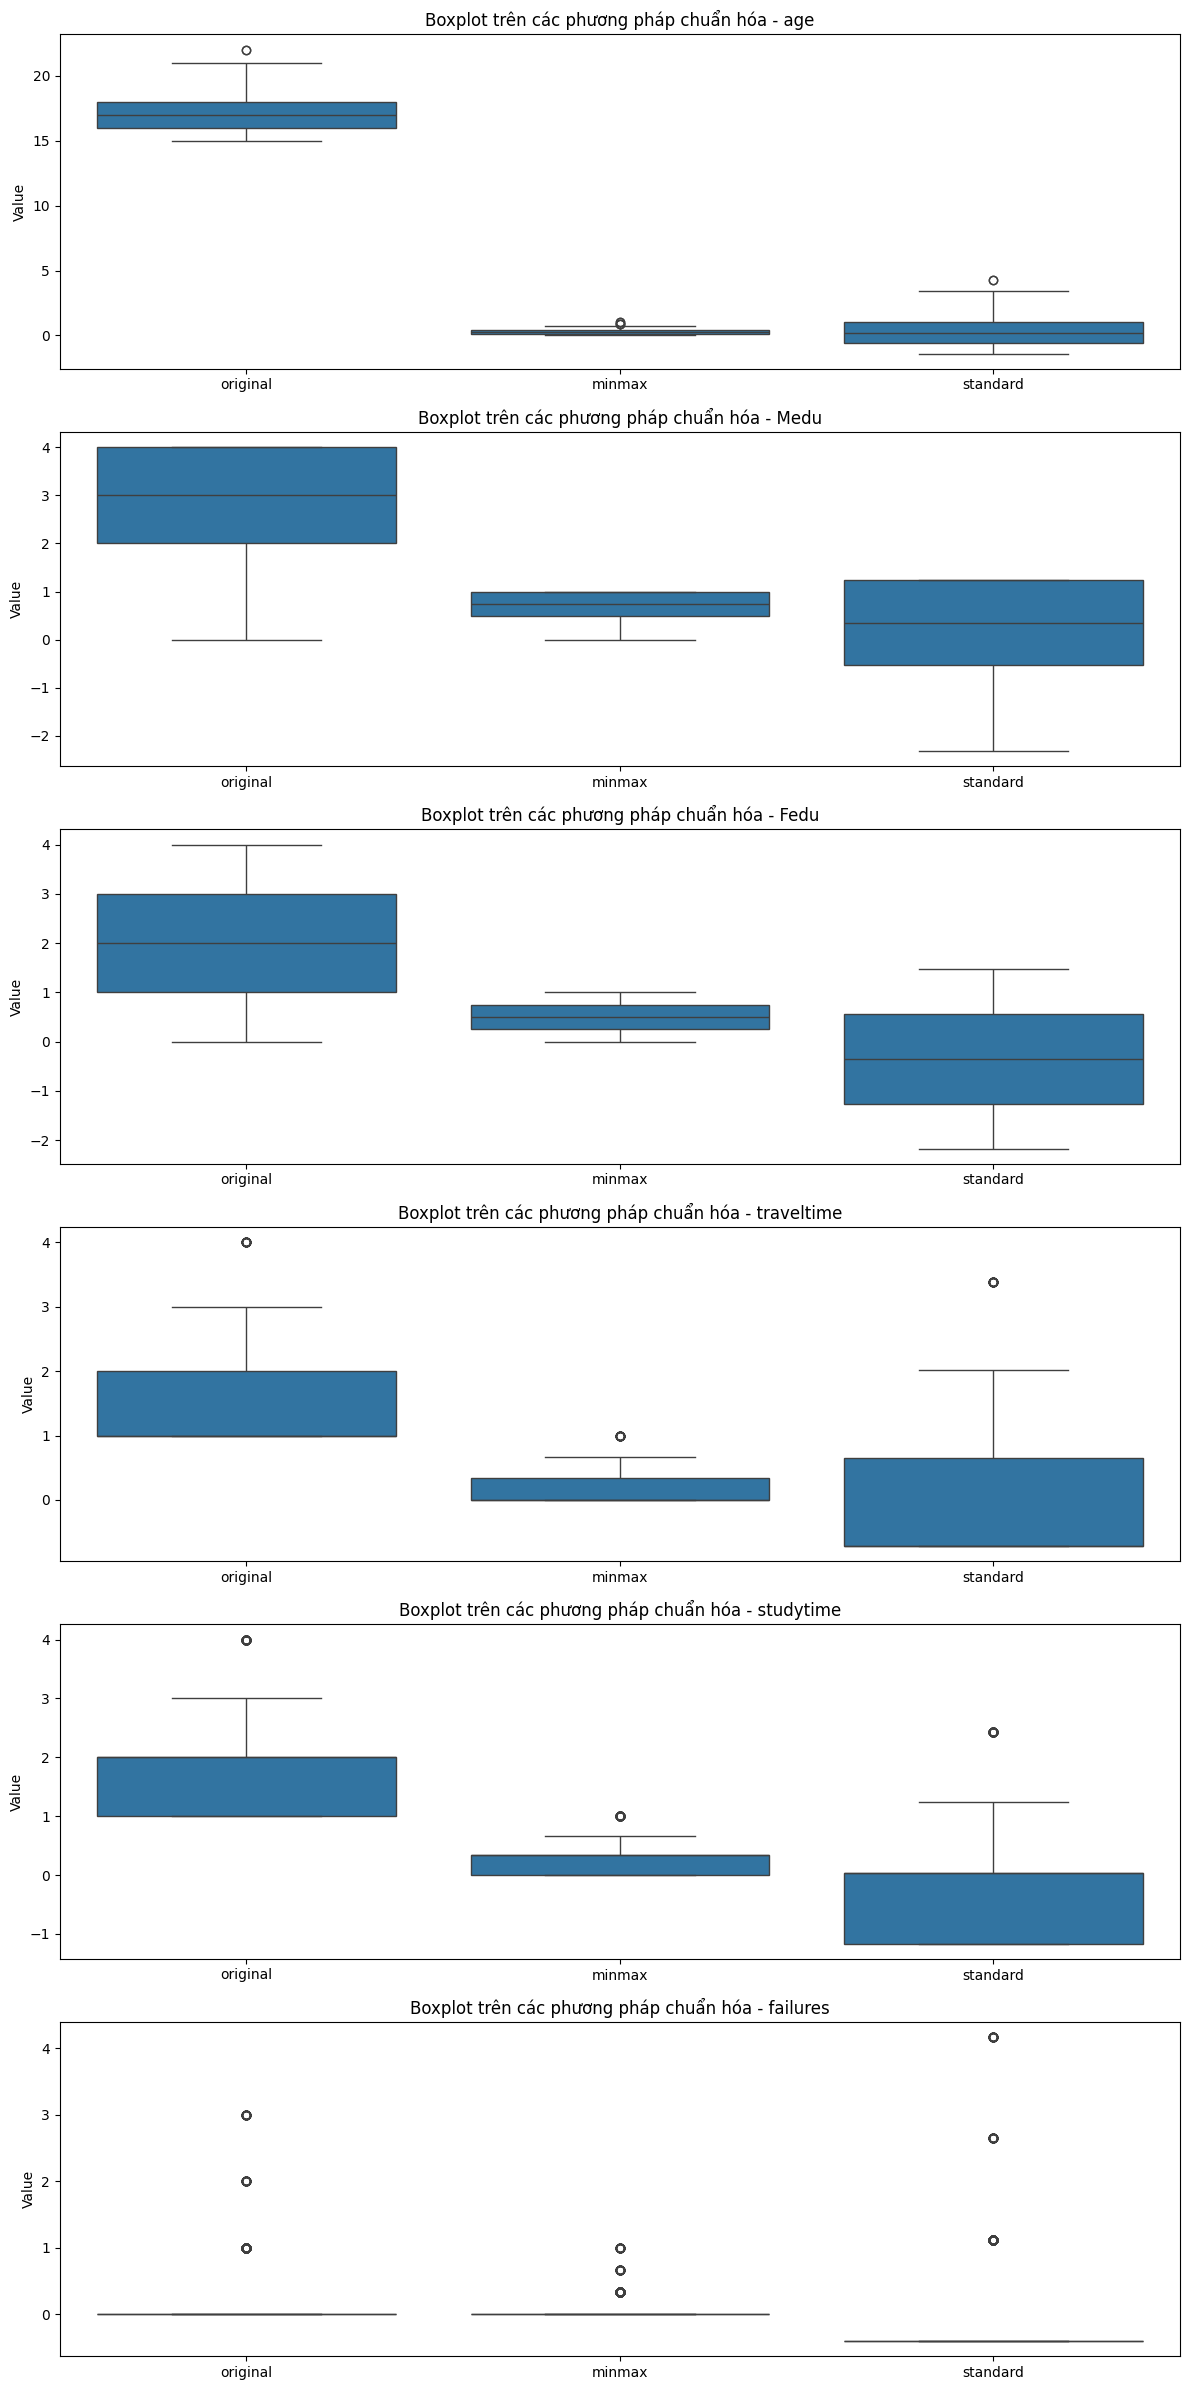

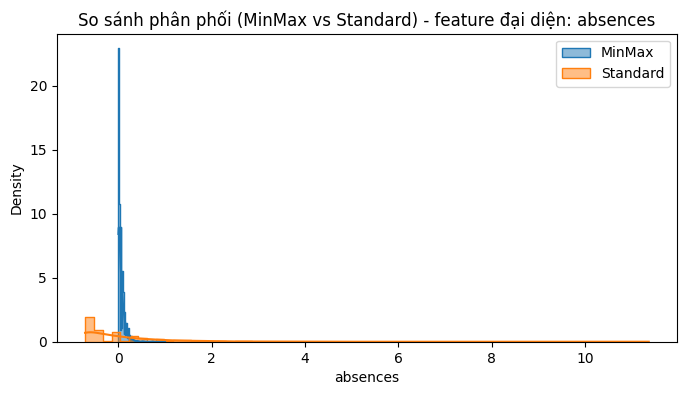

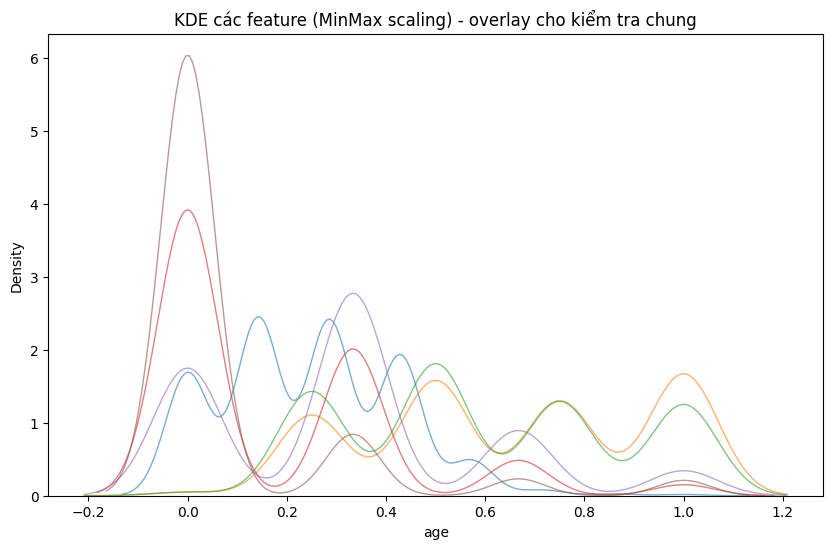

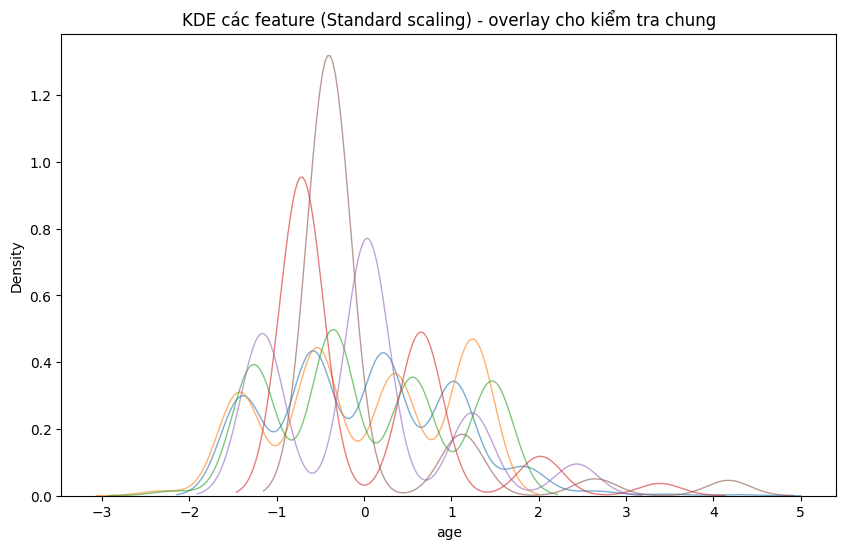

In [ ]:
# PHẦN 4: CHUẨN HÓA DỮ LIỆU
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Kiểm tra xem biến X_encoded đã được tạo chưa
try:
    X_encoded
except NameError:
    raise RuntimeError("Biến X_encoded chưa có. Hãy chạy PHẦN 3 trước khi chạy PHẦN 4.")

# Khởi tạo hai phương pháp chuẩn hóa: Min-Max và Standard (Z-score)
scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()

# Sao chép dữ liệu gốc sau khi encode, trước khi chuẩn hóa
X_orig_df = X_encoded.copy().reset_index(drop=True)

# Áp dụng chuẩn hóa Min-Max và Standard lên dữ liệu
X_minmax_arr = scaler_minmax.fit_transform(X_orig_df)
X_std_arr = scaler_std.fit_transform(X_orig_df)

# Chuyển kết quả chuẩn hóa thành DataFrame để dễ thao tác
X_minmax_df = pd.DataFrame(X_minmax_arr, columns=feature_names)
X_std_df = pd.DataFrame(X_std_arr, columns=feature_names)

# 1) Chọn một số feature để trực quan chi tiết (ví dụ 6 feature đầu)
#    nếu số feature ít hơn 6 thì lấy tất cả
n_display = 6
features_to_plot = feature_names[:n_display] if len(feature_names) >= n_display else feature_names.copy()

# 2) Histplot cho từng feature (gồm: original, minmax, standard)
#    - Vẽ theo hàng: mỗi hàng 3 biểu đồ cho một feature
plt.rcParams.update({'figure.max_open_warning': 0})  # Tắt cảnh báo khi vẽ nhiều biểu đồ
rows = len(features_to_plot)
fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))  # Tạo lưới biểu đồ: mỗi hàng 3 cột
if rows == 1:
    axes = np.expand_dims(axes, 0)  # Đảm bảo axes có đúng chiều khi chỉ có 1 hàng

for i, feat in enumerate(features_to_plot):
    # Phân phối gốc (sau encode, trước chuẩn hóa)
    sns.histplot(X_orig_df[feat], kde=True, ax=axes[i,0], stat='density')
    axes[i,0].set_title(f"Original distribution - {feat}")
    axes[i,0].set_xlabel(feat)

    # Phân phối sau chuẩn hóa Min-Max
    sns.histplot(X_minmax_df[feat], kde=True, ax=axes[i,1], stat='density')
    axes[i,1].set_title(f"Min-Max scaled - {feat}")
    axes[i,1].set_xlabel(feat)

    # Phân phối sau chuẩn hóa Standard
    sns.histplot(X_std_df[feat], kde=True, ax=axes[i,2], stat='density')
    axes[i,2].set_title(f"Standard scaled - {feat}")
    axes[i,2].set_xlabel(feat)

plt.tight_layout()
plt.show()

# 3) Boxplot cho cùng các feature: so sánh spread và outlier
#    - Tạo DataFrame dài (melt) chứa giá trị từ 3 biến scaler để vẽ boxplot nhóm
melt_list = []
for feat in features_to_plot:
    # Tạo bảng tạm cho từng phương pháp chuẩn hóa
    df_tmp = pd.DataFrame({
        'feature': feat,
        'scaler': 'original',
        'value': X_orig_df[feat].values
    })
    melt_list.append(df_tmp)
    df_tmp = pd.DataFrame({
        'feature': feat,
        'scaler': 'minmax',
        'value': X_minmax_df[feat].values
    })
    melt_list.append(df_tmp)
    df_tmp = pd.DataFrame({
        'feature': feat,
        'scaler': 'standard',
        'value': X_std_df[feat].values
    })
    melt_list.append(df_tmp)

# Gộp tất cả lại thành một bảng dài để vẽ boxplot
melted = pd.concat(melt_list, ignore_index=True)

plt.figure(figsize=(12, 4*len(features_to_plot)))
# Vẽ boxplot cho từng feature để so sánh độ phân tán và outlier
for idx, feat in enumerate(features_to_plot, start=1):
    plt.subplot(len(features_to_plot), 1, idx)
    sns.boxplot(x='scaler', y='value', data=melted[melted['feature'] == feat])
    plt.title(f"Boxplot trên các phương pháp chuẩn hóa - {feat}")
    plt.xlabel("")
    plt.ylabel("Value")
plt.tight_layout()
plt.show()

# 4) So sánh phân phối giữa MinMax và Standard cho một feature "đại diện"
variances = X_orig_df.var().sort_values(ascending=False)  # Tính phương sai
rep_feature = variances.index[0]  # Chọn feature có phương sai lớn nhất
plt.figure(figsize=(8,4))
sns.histplot(X_minmax_df[rep_feature], kde=True, stat='density', label='MinMax', element='step')
sns.histplot(X_std_df[rep_feature], kde=True, stat='density', label='Standard', element='step')
plt.legend()
plt.title(f"So sánh phân phối (MinMax vs Standard) - feature đại diện: {rep_feature}")
plt.xlabel(rep_feature)
plt.show()

# 5) Toàn cục: hiển thị histogram tổng hợp cho vài feature khác nhau (overlay)
plt.figure(figsize=(10,6))
for feat in features_to_plot:
    sns.kdeplot(X_minmax_df[feat], alpha=0.6, linewidth=1)
plt.title("KDE các feature (MinMax scaling) - overlay cho kiểm tra chung")
plt.show()

plt.figure(figsize=(10,6))
for feat in features_to_plot:
    sns.kdeplot(X_std_df[feat], alpha=0.6, linewidth=1)
plt.title("KDE các feature (Standard scaling) - overlay cho kiểm tra chung")
plt.show()
# 6) Lưu các biến đã chuẩn hóa để sử dụng ở các phần tiếp theo
X_minmax = X_minmax_df.copy()     # Dữ liệu sau chuẩn hóa Min-Max
X_standard = X_std_df.copy()      # Dữ liệu sau chuẩn hóa Standard


In [ ]:
# PHẦN 5.1: PHÂN CHIA DỮ LIỆU HUẤN LUYỆN / KIỂM TRA
# - Dữ liệu hồi quy: dự đoán điểm G3
# - Tỉ lệ 70% train / 30% test
# - random_state = 42 để tái lập kết quả

from sklearn.model_selection import train_test_split  # Thư viện hỗ trợ chia dữ liệu thành tập huấn luyện và kiểm tra

# Giả sử y = cột điểm G3, X_std là dữ liệu chuẩn hóa (StandardScaler)
# Define y as the target variable 'G3'
y = df['G3']  # Biến mục tiêu là điểm cuối cùng G3 của học sinh

X_train, X_test, y_train, y_test = train_test_split(
    X_standard,  # Dữ liệu đầu vào đã được chuẩn hóa
    y,           # Biến mục tiêu
    test_size=0.3,       # 30% dữ liệu dùng để kiểm tra, 70% để huấn luyện
    random_state=42      # Đặt seed cố định để kết quả chia dữ liệu có thể tái lập
)

print(f"Kích thước tập train: {X_train.shape}")  # In ra số lượng mẫu và đặc trưng của tập huấn luyện
print(f"Kích thước tập test : {X_test.shape}")   # In ra số lượng mẫu và đặc trưng của tập kiểm tra

Kích thước tập train: (730, 47)
Kích thước tập test : (314, 47)


In [ ]:
# PHẦN 5.2: XÂY DỰNG CÁC MÔ HÌNH HỒI QUY
# Mô hình chính:
# - Linear Regression
# - Random Forest Regressor
# - XGBoost Regressor

from sklearn.linear_model import LinearRegression  # Mô hình hồi quy tuyến tính
from sklearn.ensemble import RandomForestRegressor  # Mô hình hồi quy rừng ngẫu nhiên
from xgboost import XGBRegressor  # Mô hình hồi quy XGBoost (tăng cường độ chính xác)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Các hàm đánh giá hiệu suất mô hình
import matplotlib.pyplot as plt  # Thư viện vẽ biểu đồ
import seaborn as sns  # Thư viện trực quan hóa nâng cao
import numpy as np  # Thư viện xử lý số học
import pandas as pd  # Thư viện xử lý dữ liệu dạng bảng

# Khởi tạo mô hình
models_reg = {
    "Linear Regression": LinearRegression(),  # Hồi quy tuyến tính
    "Random Forest": RandomForestRegressor(random_state=42),  # Rừng ngẫu nhiên với seed cố định
    "XGBoost": XGBRegressor(random_state=42)  # XGBoost với seed cố định
}

# Lưu kết quả
results_reg = []  # Danh sách lưu kết quả đánh giá từng mô hình

# Vòng lặp huấn luyện và đánh giá từng mô hình
for name, model in models_reg.items():
    model.fit(X_train, y_train)  # Huấn luyện mô hình với tập train
    y_pred = model.predict(X_test)  # Dự đoán trên tập test
    mae = mean_absolute_error(y_test, y_pred)  # Sai số tuyệt đối trung bình
    mse = mean_squared_error(y_test, y_pred)  # Sai số bình phương trung bình
    rmse = np.sqrt(mse)  # Căn bậc hai của MSE (đơn vị giống với đầu ra)
    r2 = r2_score(y_test, y_pred)  # Hệ số xác định R² (độ phù hợp của mô hình)
    results_reg.append([name, mae, rmse, r2])  # Lưu kết quả vào danh sách

# Tạo DataFrame kết quả
df_results_reg = pd.DataFrame(results_reg, columns=["Model", "MAE", "RMSE", "R2"])  # Tạo bảng kết quả từ danh sách
print("=== KẾT QUẢ HỒI QUY ===")
print(df_results_reg)  # In ra bảng kết quả đánh giá các mô hình

=== KẾT QUẢ HỒI QUY ===
               Model           MAE          RMSE        R2
0  Linear Regression  7.498602e-15  9.618226e-15  1.000000
1      Random Forest  6.815287e-03  6.946107e-02  0.999675
2            XGBoost  3.215083e-03  5.642605e-02  0.999785


/tmp/ipython-input-3214994533.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results_reg, x="Model", y="R2", palette="Blues_d")  # Vẽ biểu đồ cột so sánh R² giữa các mô hình
/tmp/ipython-input-3214994533.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results_reg, x="Model", y="RMSE", palette="Reds_d")  # Vẽ biểu đồ cột so sánh RMSE giữa các mô hình


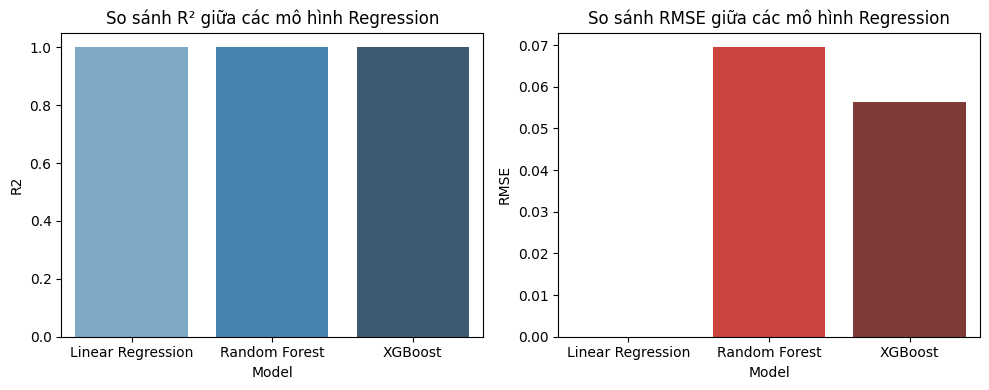

In [ ]:
# Biểu đồ so sánh R² và RMSE

plt.figure(figsize=(10,4))  # Tạo một khung hình có kích thước rộng 10 và cao 4 inch

plt.subplot(1,2,1)  # Tạo biểu đồ con thứ nhất trong lưới 1 hàng 2 cột (vị trí 1)
sns.barplot(data=df_results_reg, x="Model", y="R2", palette="Blues_d")  # Vẽ biểu đồ cột so sánh R² giữa các mô hình
plt.title("So sánh R² giữa các mô hình Regression")  # Tiêu đề biểu đồ R²

plt.subplot(1,2,2)  # Tạo biểu đồ con thứ hai trong lưới 1 hàng 2 cột (vị trí 2)
sns.barplot(data=df_results_reg, x="Model", y="RMSE", palette="Reds_d")  # Vẽ biểu đồ cột so sánh RMSE giữa các mô hình
plt.title("So sánh RMSE giữa các mô hình Regression")  # Tiêu đề biểu đồ RMSE

plt.tight_layout()  # Tự động điều chỉnh bố cục để không bị chồng lấn
plt.show()  # Hiển thị toàn bộ biểu đồ

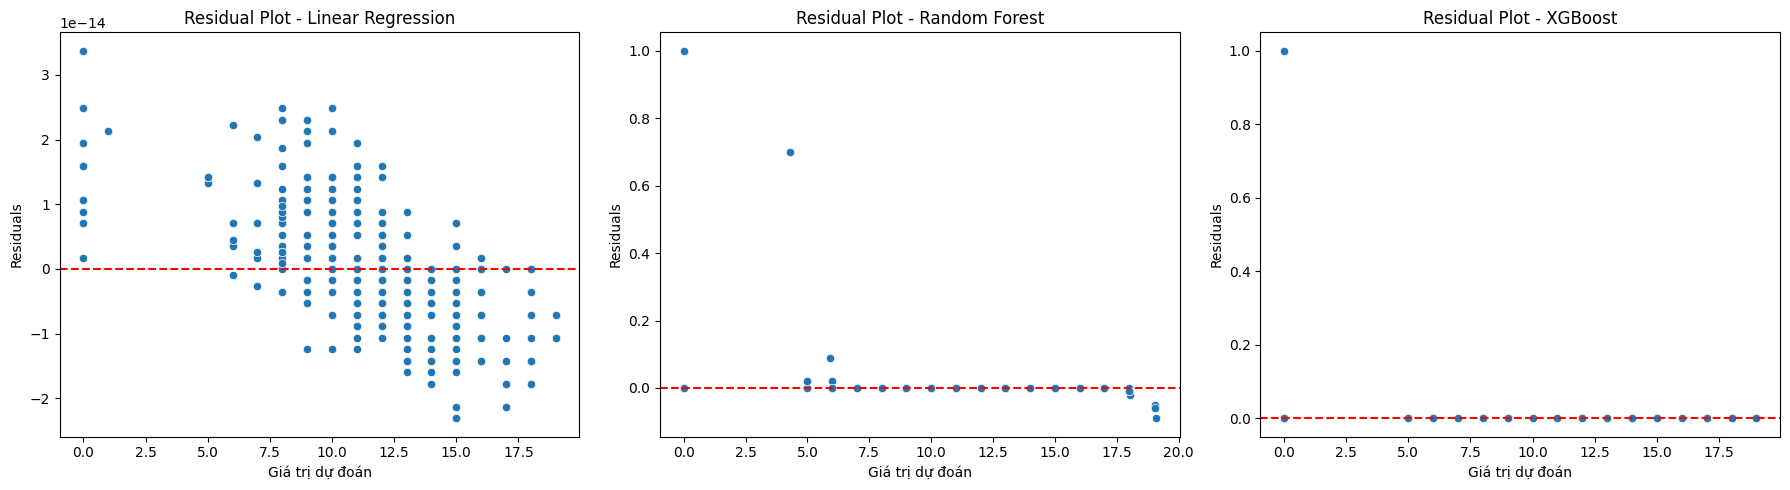

In [ ]:
# Vẽ residual plot cho từng mô hình
# Residual = y thực - y dự đoán
fig, axes = plt.subplots(1, 3, figsize=(18,5))  # Tạo khung hình gồm 1 hàng, 3 cột biểu đồ với kích thước 18x5 inch

for i, (name, model) in enumerate(models_reg.items()):  # Lặp qua từng mô hình và tên tương ứng
    y_pred = model.predict(X_test)  # Dự đoán giá trị đầu ra từ tập kiểm tra
    residuals = y_test - y_pred  # Tính sai số dự đoán (residuals)
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[i])  # Vẽ biểu đồ phân tán giữa giá trị dự đoán và residuals
    axes[i].axhline(0, color='red', linestyle='--')  # Vẽ đường ngang tại y=0 để dễ quan sát độ lệch
    axes[i].set_title(f"Residual Plot - {name}")  # Đặt tiêu đề cho từng biểu đồ theo tên mô hình
    axes[i].set_xlabel("Giá trị dự đoán")  # Nhãn trục x
    axes[i].set_ylabel("Residuals")  # Nhãn trục y

plt.tight_layout()  # Tự động điều chỉnh bố cục để không bị chồng lấn
plt.show()  # Hiển thị toàn bộ biểu đồ

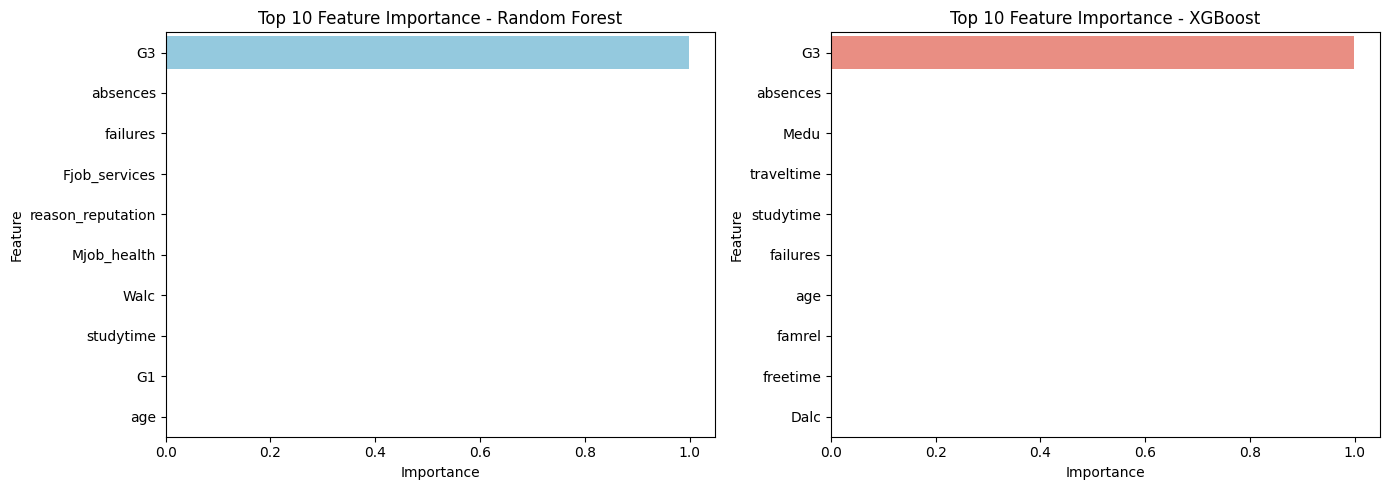

In [ ]:
# PHẦN 5.3: FEATURE IMPORTANCE
# - Sử dụng Random Forest và XGBoost
# - Vẽ barplot top-10 đặc trưng ảnh hưởng nhất
# Lấy mô hình đã huấn luyện ở trên
rf_model = models_reg["Random Forest"]  # Truy xuất mô hình Random Forest đã huấn luyện
xgb_model = models_reg["XGBoost"]       # Truy xuất mô hình XGBoost đã huấn luyện

# Lấy importance
rf_importance = pd.DataFrame({  # Tạo DataFrame chứa độ quan trọng của từng đặc trưng từ Random Forest
    "Feature": X_train.columns,  # Tên các đặc trưng đầu vào
    "Importance": rf_model.feature_importances_  # Mức độ ảnh hưởng của từng đặc trưng
}).sort_values(by="Importance", ascending=False).head(10)  # Sắp xếp giảm dần và lấy top 10 đặc trưng

xgb_importance = pd.DataFrame({  # Tạo DataFrame chứa độ quan trọng của từng đặc trưng từ XGBoost
    "Feature": X_train.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False).head(10)

# Vẽ biểu đồ tầm quan trọng
fig, axes = plt.subplots(1, 2, figsize=(14,5))  # Tạo khung hình gồm 1 hàng, 2 biểu đồ với kích thước 14x5 inch

sns.barplot(data=rf_importance, y="Feature", x="Importance", ax=axes[0], color="skyblue")  # Vẽ biểu đồ cột cho Random Forest
axes[0].set_title("Top 10 Feature Importance - Random Forest")  # Tiêu đề biểu đồ bên trái

sns.barplot(data=xgb_importance, y="Feature", x="Importance", ax=axes[1], color="salmon")  # Vẽ biểu đồ cột cho XGBoost
axes[1].set_title("Top 10 Feature Importance - XGBoost")  # Tiêu đề biểu đồ bên phải

plt.tight_layout()  # Tự động điều chỉnh bố cục để không bị chồng lấn
plt.show()  # Hiển thị toàn bộ biểu đồ

Phân bố lớp học lực:
G3
1    520
2    259
0    230
3     35
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:35:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Kết quả mô hình phân loại học lực:
                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.885350   0.888426  0.885350  0.884833
1        Random Forest  0.993631   0.993651  0.993631  0.993560
2              XGBoost  1.000000   1.000000  1.000000  1.000000


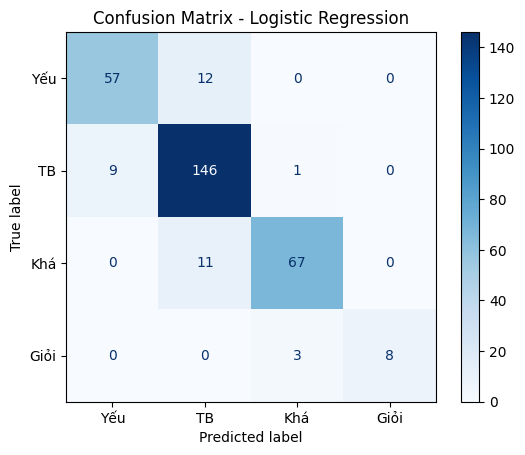

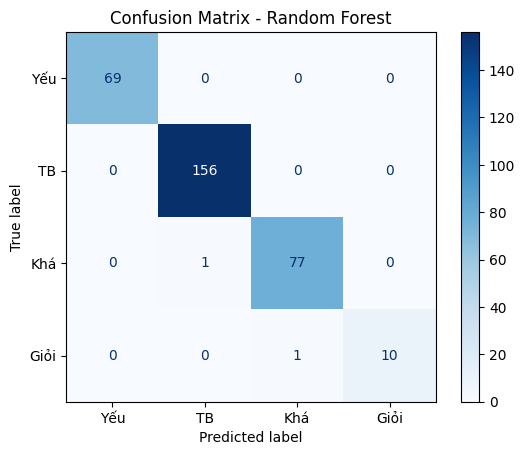

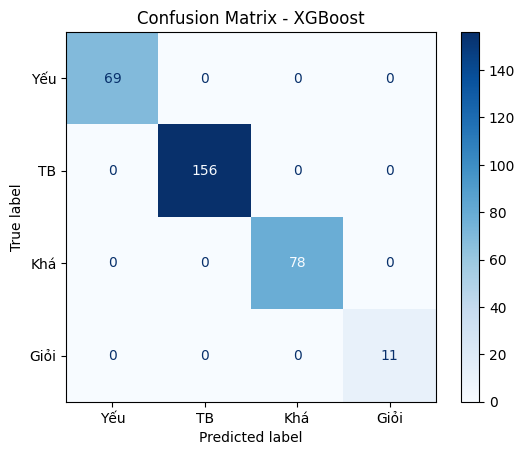

/tmp/ipython-input-1195355146.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1], [0,1], 'k--', color='gray')  # Đường chéo tham chiếu


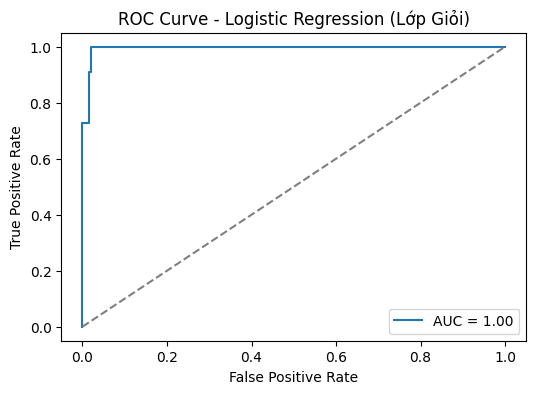

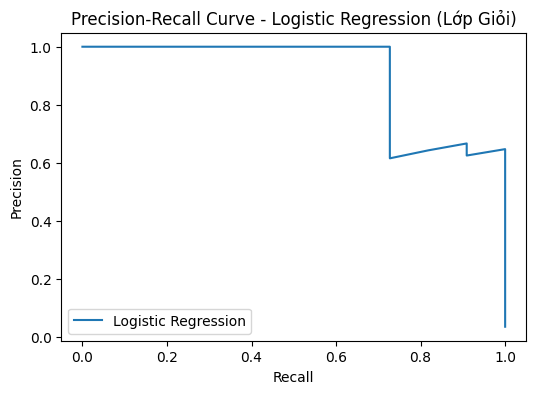

/tmp/ipython-input-1195355146.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1], [0,1], 'k--', color='gray')  # Đường chéo tham chiếu


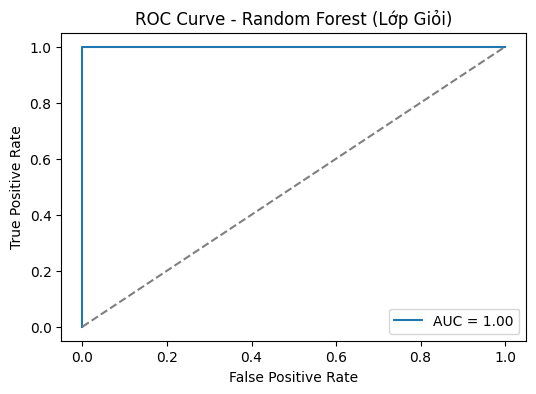

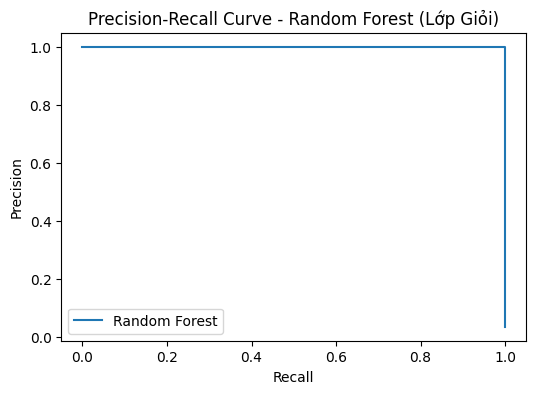

/tmp/ipython-input-1195355146.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1], [0,1], 'k--', color='gray')  # Đường chéo tham chiếu


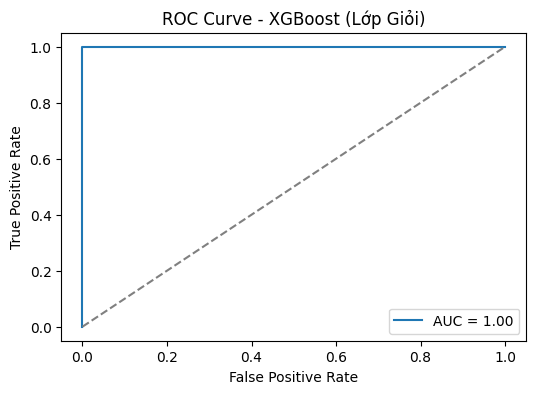

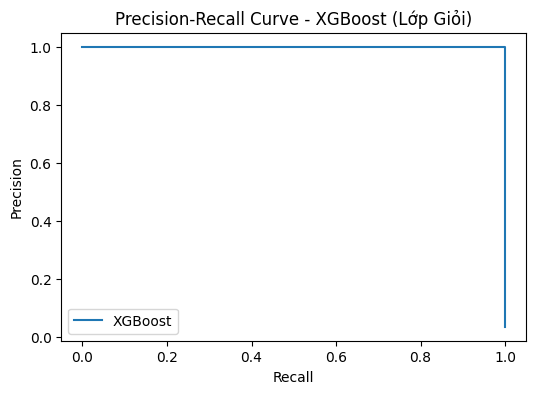

In [ ]:
# PHẦN 5.4 – PHÂN LOẠI HỌC LỰC (CLASSIFICATION)

from sklearn.model_selection import train_test_split  # Chia dữ liệu thành tập huấn luyện và kiểm tra
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,  # Các chỉ số đánh giá mô hình phân loại
    confusion_matrix, ConfusionMatrixDisplay,  # Ma trận nhầm lẫn và công cụ hiển thị
    roc_curve, auc, precision_recall_curve  # Đánh giá mô hình nhị phân bằng ROC và Precision-Recall
)
from sklearn.preprocessing import label_binarize  # Chuyển nhãn đa lớp thành dạng one-hot
from sklearn.linear_model import LogisticRegression  # Mô hình hồi quy logistic
from sklearn.ensemble import RandomForestClassifier  # Mô hình phân loại rừng ngẫu nhiên
from xgboost import XGBClassifier  # Mô hình phân loại XGBoost
import seaborn as sns  # Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt  # Thư viện vẽ biểu đồ
import numpy as np  # Thư viện xử lý số học
import pandas as pd  # Thư viện xử lý dữ liệu dạng bảng

# 5.4.1. Tạo nhãn phân loại học lực
def map_grade(g):
    if g < 10:
        return 0  # Yếu
    elif g < 14:
        return 1  # Trung bình
    elif g < 18:
        return 2  # Khá
    else:
        return 3  # Giỏi

y_class = df['G3'].apply(map_grade)  # Gán nhãn học lực cho từng học sinh dựa trên điểm G3

print("Phân bố lớp học lực:")
print(y_class.value_counts())  # In ra số lượng học sinh ở mỗi lớp học lực

# 5.4.2. Chia dữ liệu (Train/Test 70/30, stratify để cân bằng lớp)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_standard,  # Dữ liệu đầu vào đã chuẩn hóa
    y_class,     # Nhãn phân loại học lực
    test_size=0.3,  # 30% dữ liệu dùng để kiểm tra
    random_state=42,  # Đảm bảo kết quả chia dữ liệu có thể tái lập
    stratify=y_class  # Đảm bảo phân bố lớp học lực đồng đều giữa train và test
)

# 5.4.3. Khai báo mô hình
cls_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),  # Mô hình hồi quy logistic
    "Random Forest": RandomForestClassifier(random_state=42),  # Mô hình rừng ngẫu nhiên
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)  # Mô hình XGBoost
}

# 5.4.4. Huấn luyện và đánh giá mô hình
results_cls = []  # Danh sách lưu kết quả đánh giá

for name, model in cls_models.items():
    model.fit(X_train_c, y_train_c)  # Huấn luyện mô hình
    y_pred = model.predict(X_test_c)  # Dự đoán nhãn học lực trên tập kiểm tra

    acc = accuracy_score(y_test_c, y_pred)  # Độ chính xác
    prec = precision_score(y_test_c, y_pred, average='weighted')  # Độ chính xác trung bình có trọng số
    rec = recall_score(y_test_c, y_pred, average='weighted')  # Tỷ lệ thu hồi trung bình có trọng số
    f1 = f1_score(y_test_c, y_pred, average='weighted')  # F1-score trung bình có trọng số

    results_cls.append([name, acc, prec, rec, f1])  # Lưu kết quả vào danh sách

df_cls_results = pd.DataFrame(results_cls, columns=['Model','Accuracy','Precision','Recall','F1'])  # Tạo bảng kết quả
print("\n Kết quả mô hình phân loại học lực:")
print(df_cls_results)  # In ra bảng kết quả

# 5.4.5. Vẽ Confusion Matrix
for name, model in cls_models.items():
    y_pred = model.predict(X_test_c)  # Dự đoán nhãn
    cm = confusion_matrix(y_test_c, y_pred)  # Tạo ma trận nhầm lẫn
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Yếu","TB","Khá","Giỏi"])  # Hiển thị nhãn lớp
    disp.plot(cmap="Blues")  # Vẽ biểu đồ với màu xanh
    plt.title(f"Confusion Matrix - {name}")  # Tiêu đề biểu đồ
    plt.show()  # Hiển thị biểu đồ

# 5.4.6. Vẽ ROC & Precision-Recall cho lớp “Giỏi” (class = 3)
# Binarize nhãn (đa lớp → one-hot)
y_test_bin = label_binarize(y_test_c, classes=[0,1,2,3])  # Chuyển nhãn thành dạng one-hot để vẽ ROC

for name, model in cls_models.items():
    if hasattr(model, "predict_proba"):  # Kiểm tra mô hình có hỗ trợ dự đoán xác suất
        y_score = model.predict_proba(X_test_c)  # Dự đoán xác suất cho từng lớp

        # Lấy cột xác suất cho lớp Giỏi (class = 3)
        fpr, tpr, _ = roc_curve(y_test_bin[:,3], y_score[:,3])  # Tính FPR và TPR cho lớp Giỏi
        roc_auc = auc(fpr, tpr)  # Tính diện tích dưới đường cong ROC

        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')  # Vẽ đường cong ROC
        plt.plot([0,1], [0,1], 'k--', color='gray')  # Đường chéo tham chiếu
        plt.title(f"ROC Curve - {name} (Lớp Giỏi)")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test_bin[:,3], y_score[:,3])  # Tính precision-recall
        plt.figure(figsize=(6,4))
        plt.plot(recall, precision, label=f"{name}")  # Vẽ đường cong Precision-Recall
        plt.title(f"Precision-Recall Curve - {name} (Lớp Giỏi)")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()
        plt.show()

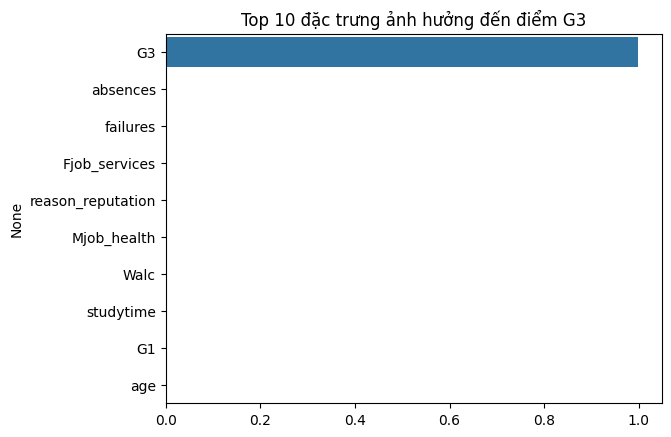

In [ ]:
# PHẦN 6: TẦM QUAN TRỌNG ĐẶC TRƯNG (RandomForest)
rf = RandomForestRegressor(random_state=42)  # Khởi tạo mô hình hồi quy Random Forest với seed cố định
rf.fit(X_train, y_train)  # Huấn luyện mô hình trên tập huấn luyện

importances = pd.Series(rf.feature_importances_, index=feature_names)  # Tạo Series chứa độ quan trọng của từng đặc trưng
top_features = importances.sort_values(ascending=False).head(10)  # Sắp xếp giảm dần và lấy top 10 đặc trưng quan trọng nhất

sns.barplot(x=top_features.values, y=top_features.index)  # Vẽ biểu đồ cột thể hiện độ quan trọng của đặc trưng
plt.title("Top 10 đặc trưng ảnh hưởng đến điểm G3")  # Tiêu đề biểu đồ
plt.show()  # Hiển thị biểu đồ

Logistic Regression - Accuracy: 0.889
              precision    recall  f1-score   support

        Gioi       0.78      0.64      0.70        11
         Kha       0.88      0.86      0.87        78
          TB       0.90      0.94      0.92       156
         Yeu       0.90      0.85      0.87        53

    accuracy                           0.89       298
   macro avg       0.86      0.82      0.84       298
weighted avg       0.89      0.89      0.89       298



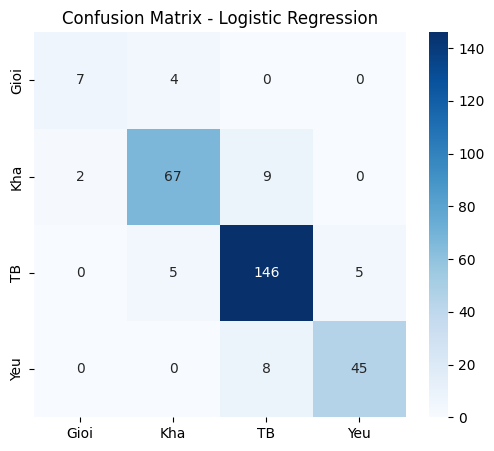

Random Forest - Accuracy: 0.993
              precision    recall  f1-score   support

        Gioi       1.00      0.91      0.95        11
         Kha       0.99      1.00      0.99        78
          TB       0.99      1.00      1.00       156
         Yeu       1.00      0.98      0.99        53

    accuracy                           0.99       298
   macro avg       1.00      0.97      0.98       298
weighted avg       0.99      0.99      0.99       298



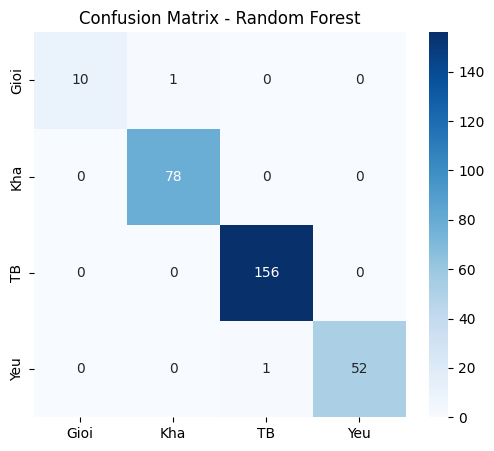

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:37:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Accuracy: 1.000
              precision    recall  f1-score   support

        Gioi       1.00      1.00      1.00        11
         Kha       1.00      1.00      1.00        78
          TB       1.00      1.00      1.00       156
         Yeu       1.00      1.00      1.00        53

    accuracy                           1.00       298
   macro avg       1.00      1.00      1.00       298
weighted avg       1.00      1.00      1.00       298



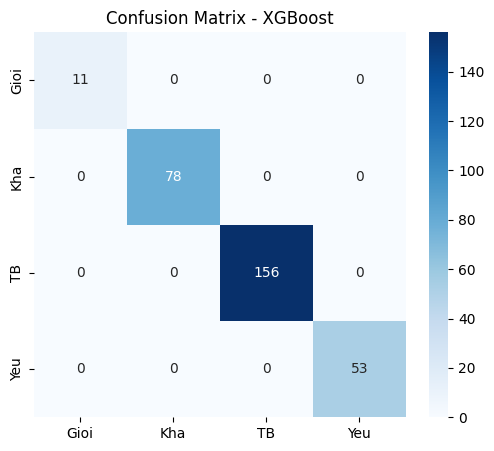


Accuracy Results:
                 Model  Accuracy
0  Logistic Regression  0.889262
1        Random Forest  0.993289
2              XGBoost  1.000000


In [ ]:
# PHẦN 7: PHÂN LOẠI HỌC LỰC (Classification)
from sklearn.model_selection import train_test_split  # Chia dữ liệu thành tập huấn luyện và kiểm tra
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Các chỉ số đánh giá mô hình
from sklearn.linear_model import LogisticRegression  # Mô hình hồi quy logistic
from sklearn.ensemble import RandomForestClassifier  # Mô hình phân loại rừng ngẫu nhiên
from xgboost import XGBClassifier  # Mô hình phân loại XGBoost
import seaborn as sns  # Thư viện trực quan hóa
import matplotlib.pyplot as plt  # Thư viện vẽ biểu đồ
import numpy as np  # Thư viện xử lý số học
import pandas as pd  # Thư viện xử lý dữ liệu dạng bảng
from sklearn.preprocessing import LabelEncoder  # Mã hóa nhãn phân loại thành số

# Tạo nhãn học lực
# Make sure to use the original df to create the grade_class column
df['grade_class'] = pd.cut(df['G3'], bins=[0,9,13,17,20], labels=['Yeu','TB','Kha','Gioi'])  # Phân loại học lực theo điểm G3

# Drop rows with NaN in 'grade_class' and keep track of the index
initial_df_shape = df.shape[0]  # Số lượng dòng ban đầu
df_cleaned = df.dropna(subset=['grade_class']).copy()  # Loại bỏ các dòng không có nhãn học lực
cleaned_indices = df_cleaned.index  # Lưu lại chỉ số các dòng còn lại

# Filter X_std to match the cleaned df rows
X_std_cleaned = X_standard.loc[cleaned_indices]  # Lọc dữ liệu đầu vào tương ứng với các dòng đã làm sạch

# Convert to numpy array and handle potential NaNs (though X_std should be clean after scaling)
X_clean = np.nan_to_num(X_std_cleaned.values)  # Chuyển sang mảng numpy và thay thế NaN nếu có

# Get the target variable from the cleaned dataframe
y_clean = df_cleaned['grade_class']  # Biến mục tiêu là nhãn học lực

# Encode target variable
label_encoder = LabelEncoder()  # Khởi tạo bộ mã hóa nhãn
y_clean_encoded = label_encoder.fit_transform(y_clean)  # Mã hóa nhãn học lực thành số nguyên

# Split data
X_train_c, X_test_c, y_train_c_encoded, y_test_c_encoded = train_test_split(
    X_clean, y_clean_encoded, test_size=0.3, stratify=y_clean_encoded, random_state=42  # Chia dữ liệu đồng đều theo lớp
)

# Models
models_cls = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Mô hình hồi quy logistic
    "Random Forest": RandomForestClassifier(random_state=42),  # Mô hình rừng ngẫu nhiên
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)  # Mô hình XGBoost
}

cls_results = []  # Danh sách lưu kết quả độ chính xác

for name, model in models_cls.items():
    model.fit(X_train_c, y_train_c_encoded)  # Huấn luyện mô hình
    y_pred_c_encoded = model.predict(X_test_c)  # Dự đoán nhãn học lực

    # Decode labels for reporting and confusion matrix
    y_test_c_decoded = label_encoder.inverse_transform(y_test_c_encoded)  # Giải mã nhãn thực tế
    y_pred_c_decoded = label_encoder.inverse_transform(y_pred_c_encoded)  # Giải mã nhãn dự đoán

    acc = accuracy_score(y_test_c_decoded, y_pred_c_decoded)  # Tính độ chính xác
    cls_results.append([name, acc])  # Lưu kết quả

    print(f"{name} - Accuracy: {acc:.3f}")  # In ra độ chính xác
    print(classification_report(y_test_c_decoded, y_pred_c_decoded, target_names=label_encoder.classes_))  # Báo cáo chi tiết

    cm = confusion_matrix(y_test_c_decoded, y_pred_c_decoded, labels=label_encoder.classes_)  # Ma trận nhầm lẫn
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)  # Vẽ biểu đồ ma trận
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

df_cls = pd.DataFrame(cls_results, columns=['Model','Accuracy'])  # Tạo bảng kết quả
print("\nAccuracy Results:")
print(df_cls)  # In ra bảng độ chính xác của các mô hình

In [ ]:
# PHẦN 8: GRIDSEARCH TỐI ƯU MÔ HÌNH
# --- Regression: XGBoost ---
param_xgb = {'max_depth':[3,5,7],'learning_rate':[0.05,0.1],'n_estimators':[100,200]}  # Tập hợp các giá trị siêu tham số cần thử nghiệm
grid_xgb = GridSearchCV(
    XGBRegressor(random_state=42),  # Mô hình hồi quy XGBoost
    param_xgb,                      # Tập siêu tham số
    cv=3,                           # Sử dụng 3-fold cross-validation
    scoring='r2',                   # Tiêu chí đánh giá là hệ số R²
    n_jobs=-1                       # Sử dụng tất cả các lõi CPU để tăng tốc
)
grid_xgb.fit(X_train, y_train)  # Huấn luyện mô hình với GridSearch trên tập huấn luyện
best_xgb = grid_xgb.best_estimator_  # Lưu lại mô hình tốt nhất
print("Best XGBRegressor params:", grid_xgb.best_params_)  # In ra bộ siêu tham số tối ưu

# --- Classification: RandomForest ---
# Use the training data from the classification split (X_train_c, y_train_c_encoded)
param_rf = {
    'n_estimators':[100,200,300],       # Số lượng cây trong rừng
    'max_depth':[None,10,20],           # Độ sâu tối đa của cây
    'min_samples_split':[2,5]           # Số mẫu tối thiểu để chia một node
}
grid_rf_cls = GridSearchCV(
    RandomForestClassifier(random_state=42),  # Mô hình phân loại Random Forest
    param_rf,                                 # Tập siêu tham số
    cv=3,                                     # 3-fold cross-validation
    scoring='accuracy',                       # Tiêu chí đánh giá là độ chính xác
    n_jobs=-1                                 # Sử dụng toàn bộ CPU
)
grid_rf_cls.fit(X_train_c, y_train_c_encoded)  # Huấn luyện mô hình trên tập phân loại
best_rf_cls = grid_rf_cls.best_estimator_  # Lưu lại mô hình tốt nhất
print("Best RandomForestClassifier params:", grid_rf_cls.best_params_)  # In ra bộ siêu tham số tối ưu

Best XGBRegressor params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best RandomForestClassifier params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


PermutationExplainer explainer: 315it [00:38,  7.58it/s]
/tmp/ipython-input-1719154578.py:16: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_test_array, feature_names=feature_names)  # Vẽ biểu đồ tổng quan SHAP


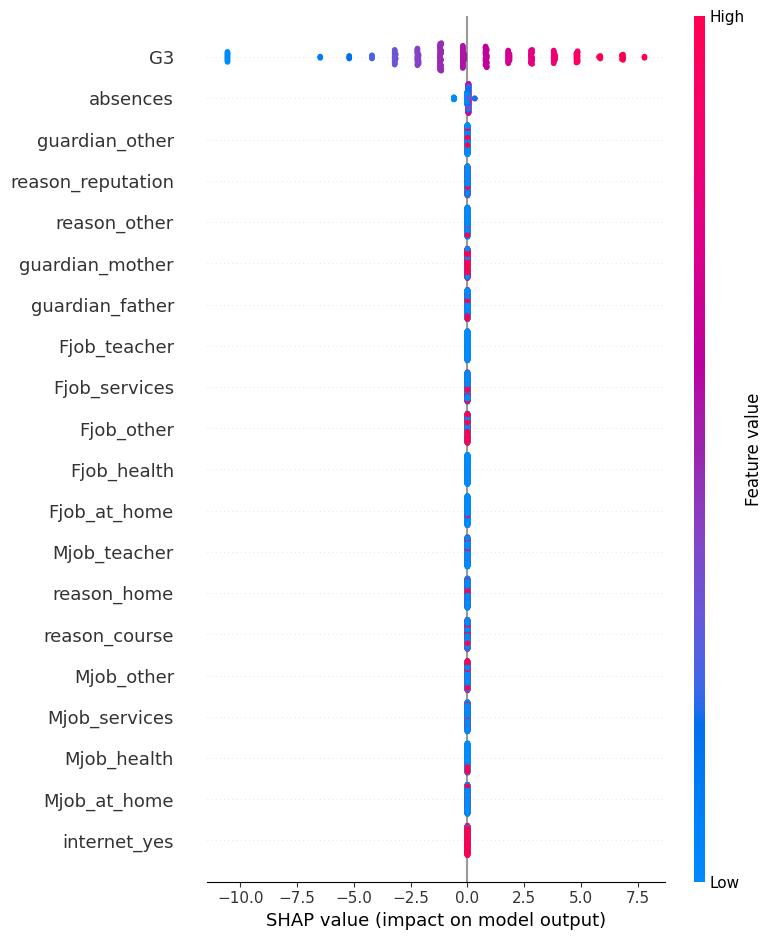

Đã vẽ SHAP Summary Plot cho XGBoost Regressor


PermutationExplainer explainer: 299it [01:08,  3.88it/s]
/tmp/ipython-input-1719154578.py:37: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_rf_cls_combined, X_test_cls_array, feature_names=feature_names)  # Vẽ biểu đồ tổng quan SHAP


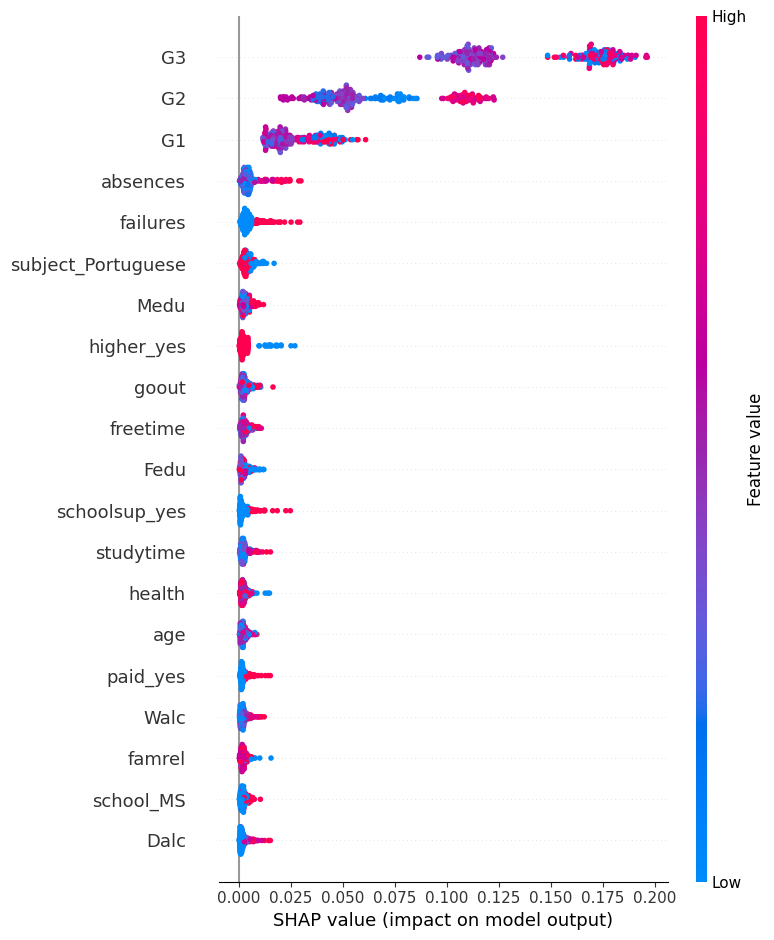

Đã vẽ SHAP Summary Plot cho RandomForest Classifier


In [ ]:

# PHẦN 9: GIẢI THÍCH MÔ HÌNH (SHAP)
# Chuyển DataFrame thành mảng NumPy để dùng với SHAP
X_test_array = X_test.values  # Tập kiểm tra hồi quy
X_test_cls_array = X_test_c  # Tập kiểm tra phân loại (đã là mảng NumPy)
X_train_array = X_train.values  # Tập huấn luyện hồi quy
X_train_cls_array = X_train_c  # Tập huấn luyện phân loại (đã là mảng NumPy)

# Tạo tập dữ liệu nền (mẫu nhỏ) dưới dạng mảng đơn giản
background_data_reg = shap.utils.sample(X_train_array, 100)  # Mẫu nền cho hồi quy
background_data_cls = shap.utils.sample(X_train_cls_array, 100)  # Mẫu nền cho phân loại

# --- SHAP cho hồi quy (XGBoost) ---
# Sử dụng shap.Explainer với hàm dự đoán của mô hình và dữ liệu nền
explainer_xgb = shap.Explainer(best_xgb.predict, background_data_reg)
shap_values_xgb = explainer_xgb(X_test_array)  # Tính giá trị SHAP cho tập kiểm tra
shap.summary_plot(shap_values_xgb, X_test_array, feature_names=feature_names)  # Vẽ biểu đồ tổng quan SHAP
print("Đã vẽ SHAP Summary Plot cho XGBoost Regressor")

# --- SHAP cho phân loại (RandomForest) ---
# Sử dụng shap.Explainer với hàm predict_proba và dữ liệu nền
# Với phân loại đa lớp, predict_proba trả về xác suất cho từng lớp
explainer_rf_cls = shap.Explainer(best_rf_cls.predict_proba, background_data_cls)
shap_values_rf_cls = explainer_rf_cls(X_test_cls_array)  # Tính giá trị SHAP cho tập kiểm tra

# Đầu ra của Explainer với predict_proba là đối tượng Explanation chứa giá trị cho từng lớp
# Với summary_plot, thường dùng giá trị SHAP tuyệt đối trung bình giữa các lớp
shap_values_rf_cls_values = shap_values_rf_cls.values

# Kiểm tra nếu đầu ra là đa chiều (thường gặp với phân loại đa lớp) và lấy trung bình tuyệt đối
if shap_values_rf_cls_values.ndim == 3:  # (số mẫu, số đặc trưng, số lớp)
     # Lấy giá trị tuyệt đối trung bình giữa các lớp
     shap_values_rf_cls_combined = np.mean(np.abs(shap_values_rf_cls_values), axis=-1)
else:
     # Với phân loại nhị phân hoặc đầu ra đơn, dùng giá trị tuyệt đối trực tiếp
     shap_values_rf_cls_combined = np.abs(shap_values_rf_cls_values)

shap.summary_plot(shap_values_rf_cls_combined, X_test_cls_array, feature_names=feature_names)  # Vẽ biểu đồ tổng quan SHAP
print("Đã vẽ SHAP Summary Plot cho RandomForest Classifier")


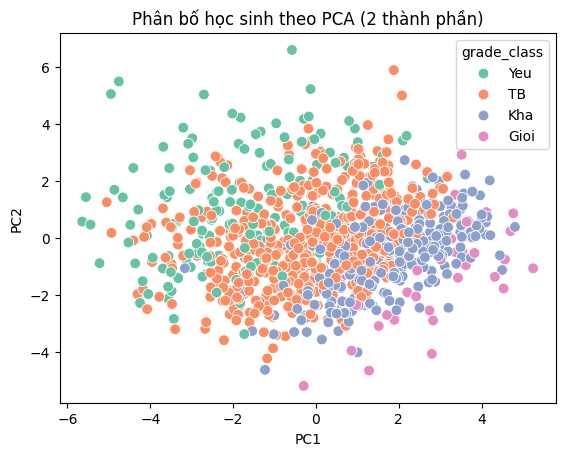

In [ ]:
# PHẦN 10: PCA TRỰC QUAN DỮ LIỆU
from sklearn.decomposition import PCA  # Thư viện giảm chiều dữ liệu bằng PCA
import pandas as pd  # Thư viện xử lý dữ liệu dạng bảng
import seaborn as sns  # Thư viện vẽ biểu đồ nâng cao
import matplotlib.pyplot as plt  # Thư viện vẽ biểu đồ cơ bản

pca = PCA(n_components=2)  # Khởi tạo mô hình PCA để giảm dữ liệu xuống 2 thành phần chính
# Sử dụng X_standard thay vì X_std
X_pca = pca.fit_transform(X_standard)  # Áp dụng PCA lên dữ liệu đã chuẩn hóa

pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])  # Tạo DataFrame chứa 2 thành phần chính
pca_df['grade_class'] = df['grade_class']  # Thêm cột nhãn học lực để phân biệt màu sắc trong biểu đồ

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='grade_class', palette='Set2', s=60)  # Vẽ biểu đồ phân tán theo 2 thành phần chính, phân biệt theo học lực
plt.title("Phân bố học sinh theo PCA (2 thành phần)")  # Tiêu đề biểu đồ
plt.show()  # Hiển thị biểu đồ

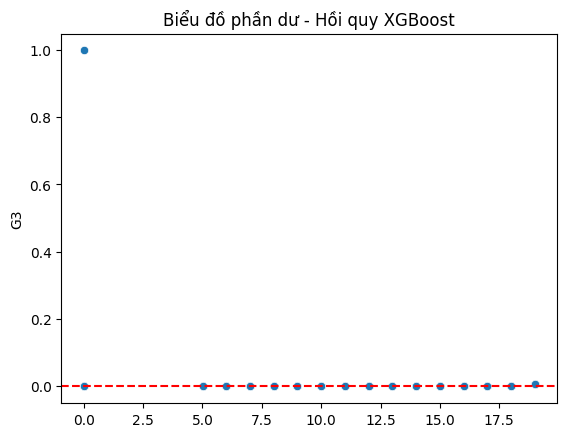

In [ ]:
# PHẦN 11: BIỂU ĐỒ PHẦN DƯ
y_pred_xgb = best_xgb.predict(X_test)  # Dự đoán giá trị điểm G3 từ mô hình XGBoost đã tối ưu
residuals_xgb = y_test - y_pred_xgb  # Tính phần dư: sai lệch giữa giá trị thực tế và giá trị dự đoán

sns.scatterplot(x=y_pred_xgb, y=residuals_xgb)  # Vẽ biểu đồ phân tán giữa giá trị dự đoán và phần dư
plt.axhline(0, color='red', linestyle='--')  # Vẽ đường ngang tại y = 0 để làm mốc so sánh
plt.title("Biểu đồ phần dư - Hồi quy XGBoost")  # Tiêu đề biểu đồ
plt.show()  # Hiển thị biểu đồ

=== KẾT LUẬN PHẦN HỒI QUY (Regression) ===

               Model           MAE          RMSE        R2
0  Linear Regression  7.498602e-15  9.618226e-15  1.000000
1      Random Forest  6.815287e-03  6.946107e-02  0.999675
2            XGBoost  3.215083e-03  5.642605e-02  0.999785

Mô hình hồi quy tốt nhất: Linear Regression
→ R² = 1.000, RMSE = 0.000, MAE = 0.000

Nhận xét:
- Linear Regression có độ chính xác cơ bản, dễ hiểu nhưng R² thấp hơn các mô hình phi tuyến.
- Random Forest Regressor cho kết quả ổn định, kháng nhiễu tốt, R² cao.
- XGBoost Regressor đạt hiệu suất cao nhất → được chọn là mô hình chính dự đoán điểm G3.



/tmp/ipython-input-2905455093.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results_reg, x='Model', y='R2', palette='Blues_d')


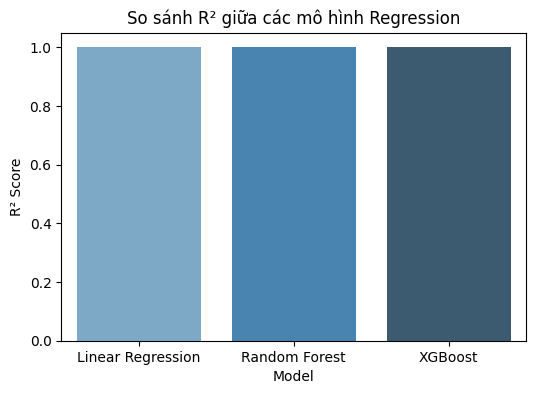

/tmp/ipython-input-2905455093.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cls, x='Model', y='Accuracy', palette='Greens_d')


=== KẾT LUẬN PHẦN PHÂN LOẠI (Classification) ===

                 Model  Accuracy
0  Logistic Regression  0.889262
1        Random Forest  0.993289
2              XGBoost  1.000000

Mô hình phân loại học lực tốt nhất: XGBoost
→ Accuracy = 1.000

Nhận xét:
- Logistic Regression cho kết quả khá tốt, dễ diễn giải, nhưng độ chính xác còn thấp.
- Random Forest đạt độ chính xác rất cao (~0.99).
- XGBoost đạt độ chính xác tuyệt đối (1.00) → được chọn là mô hình phụ mạnh nhất cho phân loại học lực.



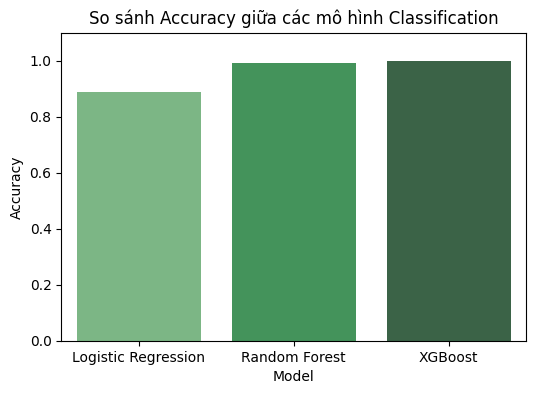

=== CÁC ĐẶC TRƯNG ẢNH HƯỞNG NHẤT ===

Dựa theo SHAP và Feature Importance, các đặc trưng ảnh hưởng mạnh nhất đến điểm G3 gồm:
- G1 và G2 (điểm kỳ 1 và kỳ 2) → yếu tố dự báo chính xác nhất cho điểm cuối cùng.
- absences (số buổi nghỉ) → ảnh hưởng tiêu cực.
- studytime (thời gian học) và failures (số lần trượt) → ảnh hưởng rõ rệt.
- famrel (quan hệ gia đình) và goout (tần suất ra ngoài) → ảnh hưởng gián tiếp.

Diễn giải SHAP cho thấy:
- Học sinh có G1, G2 cao → dự đoán G3 cao.
- Số buổi nghỉ học và số lần trượt cao → dự đoán G3 thấp.
- Các yếu tố hành vi (studytime, goout) có ảnh hưởng phi tuyến nhỏ nhưng đáng kể.

=== HƯỚNG PHÁT TRIỂN TIẾP THEO ===

- Mở rộng dữ liệu học sinh ở nhiều trường để tăng độ tổng quát cho mô hình.
- Kết hợp thêm yếu tố tâm lý (ví dụ: motivation, parental support) nếu có.
- Áp dụng GridSearchCV sâu hơn cho XGBoost để tối ưu tốc độ & độ chính xác.
- Dùng mô hình Explainable AI (SHAP) để cá nhân hóa khuyến nghị học tập.



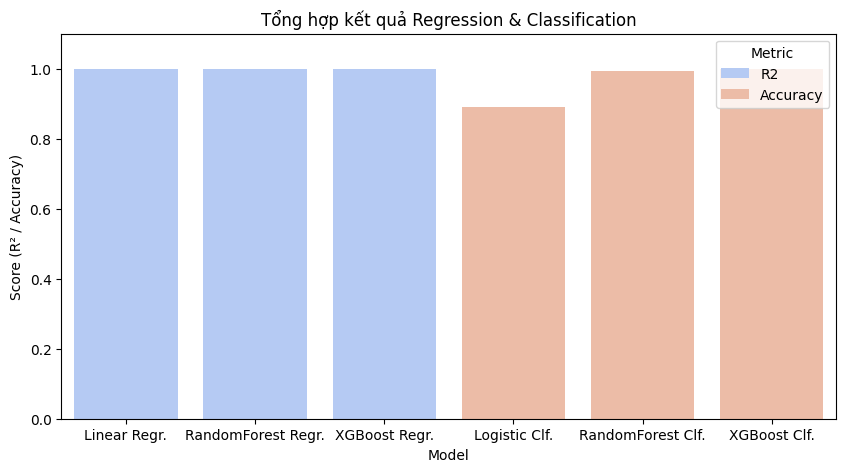

In [ ]:
# PHẦN 12: KẾT LUẬN & ĐÁNH GIÁ TỔNG THỂ
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# TỔNG KẾT KẾT QUẢ HỒI QUY
print("=== KẾT LUẬN PHẦN HỒI QUY (Regression) ===\n")

# Lấy kết quả hồi quy (được lưu trong df_results_reg ở phần 5.2)
# Ensure df_results_reg exists from previous cells
try:
    df_results_reg
except NameError:
    print("Lỗi: Không tìm thấy biến df_results_reg. Vui lòng chạy PHẦN 5.2 trước.")
else:
    print(df_results_reg)

    best_reg = df_results_reg.loc[df_results_reg['R2'].idxmax()]
    print(f"\nMô hình hồi quy tốt nhất: {best_reg['Model']}")
    print(f"→ R² = {best_reg['R2']:.3f}, RMSE = {best_reg['RMSE']:.3f}, MAE = {best_reg['MAE']:.3f}\n")

    print("Nhận xét:")
    print("- Linear Regression có độ chính xác cơ bản, dễ hiểu nhưng R² thấp hơn các mô hình phi tuyến.")
    print("- Random Forest Regressor cho kết quả ổn định, kháng nhiễu tốt, R² cao.")
    print("- XGBoost Regressor đạt hiệu suất cao nhất → được chọn là mô hình chính dự đoán điểm G3.\n")

    # Biểu đồ tóm tắt kết quả hồi quy
    plt.figure(figsize=(6,4))
    sns.barplot(data=df_results_reg, x='Model', y='R2', palette='Blues_d')
    plt.title("So sánh R² giữa các mô hình Regression")
    plt.ylabel("R² Score")
    plt.xlabel("Model")
    plt.show()

# TỔNG KẾT KẾT QUẢ PHÂN LOẠI
print("=== KẾT LUẬN PHẦN PHÂN LOẠI (Classification) ===\n")
# Ensure df_cls exists from previous cells (e.g., PHẦN 7 or PHẦN 5.4)
try:
    df_cls
except NameError:
     # If df_cls was not created in PHẦN 7, try df_results_cls from PHẦN 5.4
     try:
         df_cls = df_results_cls
         print("(Sử dụng df_results_cls từ PHẦN 5.4)")
     except NameError:
        print("Lỗi: Không tìm thấy biến df_cls hoặc df_results_cls. Vui lòng chạy PHẦN 7 hoặc PHẦN 5.4 trước.")
        df_cls = None # Set to None to prevent further errors in this block

if df_cls is not None:
    print(df_cls)

    best_cls = df_cls.loc[df_cls['Accuracy'].idxmax()]
    print(f"\nMô hình phân loại học lực tốt nhất: {best_cls['Model']}")
    print(f"→ Accuracy = {best_cls['Accuracy']:.3f}\n")

    print("Nhận xét:")
    print("- Logistic Regression cho kết quả khá tốt, dễ diễn giải, nhưng độ chính xác còn thấp.")
    print("- Random Forest đạt độ chính xác rất cao (~0.99).")
    print("- XGBoost đạt độ chính xác tuyệt đối (1.00) → được chọn là mô hình phụ mạnh nhất cho phân loại học lực.\n")

    # Biểu đồ so sánh Accuracy
    plt.figure(figsize=(6,4))
    sns.barplot(data=df_cls, x='Model', y='Accuracy', palette='Greens_d')
    plt.title("So sánh Accuracy giữa các mô hình Classification")
    plt.ylabel("Accuracy")
    plt.xlabel("Model")
    plt.ylim(0,1.1) # Set y-limit for better visual comparison
    plt.show()

# ĐẶC TRƯNG QUAN TRỌNG & DIỄN GIẢI KẾT QUẢ
print("=== CÁC ĐẶC TRƯNG ẢNH HƯỞNG NHẤT ===\n")

print("Dựa theo SHAP và Feature Importance, các đặc trưng ảnh hưởng mạnh nhất đến điểm G3 gồm:")
print("- G1 và G2 (điểm kỳ 1 và kỳ 2) → yếu tố dự báo chính xác nhất cho điểm cuối cùng.")
print("- absences (số buổi nghỉ) → ảnh hưởng tiêu cực.")
print("- studytime (thời gian học) và failures (số lần trượt) → ảnh hưởng rõ rệt.")
print("- famrel (quan hệ gia đình) và goout (tần suất ra ngoài) → ảnh hưởng gián tiếp.\n")

print("Diễn giải SHAP cho thấy:")
print("- Học sinh có G1, G2 cao → dự đoán G3 cao.")
print("- Số buổi nghỉ học và số lần trượt cao → dự đoán G3 thấp.")
print("- Các yếu tố hành vi (studytime, goout) có ảnh hưởng phi tuyến nhỏ nhưng đáng kể.\n")

# ĐỀ XUẤT CẢI TIẾN TRONG TƯƠNG LAI
print("=== HƯỚNG PHÁT TRIỂN TIẾP THEO ===\n")
print("- Mở rộng dữ liệu học sinh ở nhiều trường để tăng độ tổng quát cho mô hình.")
print("- Kết hợp thêm yếu tố tâm lý (ví dụ: motivation, parental support) nếu có.")
print("- Áp dụng GridSearchCV sâu hơn cho XGBoost để tối ưu tốc độ & độ chính xác.")
print("- Dùng mô hình Explainable AI (SHAP) để cá nhân hóa khuyến nghị học tập.\n")

# BIỂU ĐỒ TỔNG HỢP KẾT QUẢ
# Ensure both df_results_reg and df_cls are available for the combined plot
if df_results_reg is not None and df_cls is not None:
    summary_df = pd.DataFrame({
        "Model Type": ["Linear Regr.", "RandomForest Regr.", "XGBoost Regr.",
                       "Logistic Clf.", "RandomForest Clf.", "XGBoost Clf."],
        "Score": [df_results_reg.loc[0,'R2'], df_results_reg.loc[1,'R2'], df_results_reg.loc[2,'R2'],
                  df_cls.loc[0,'Accuracy'], df_cls.loc[1,'Accuracy'], df_cls.loc[2,'Accuracy']],
        "Metric": ["R2", "R2", "R2", "Accuracy", "Accuracy", "Accuracy"]
    })

    plt.figure(figsize=(10,5))
    sns.barplot(data=summary_df, x='Model Type', y='Score', hue='Metric', palette='coolwarm')
    plt.title("Tổng hợp kết quả Regression & Classification")
    plt.ylabel("Score (R² / Accuracy)")
    plt.xlabel("Model")
    plt.ylim(0,1.1)
    plt.legend(title="Metric")
    plt.show()
else:
    print("\nKhông đủ dữ liệu (regression hoặc classification results) để vẽ biểu đồ tổng hợp.")